<center><font size=6.5> Project: Machine Learning-Personal Loan Campaign</font></center>


# **Problem Statement**

### Business Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and, in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You, as a Data Scientist at AllLife Bank, have to build a model that will help the marketing department identify potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

### Data Dictionary

1. **ID**: Unique Customer ID

2. **Age**: Number of completed years

3. **Experience**: Professional experience in years

4. **Income**: Annual income in thousand dollars

5. **ZIP Code**: Home address ZIP code

6. **Family**: Family size

7. **CCAvg**: Average monthly credit card spending in thousand dollars

8. **Education**: Education level (1: Undergrad, 2: Graduate, 3: Advanced/
   Professional)

9. **Mortgage**: Value of house mortgage in thousand dollars (if applicable)

10. **Personal Loan**: Whether the customer accepted a personal loan offer

11. **Securities Account**: Whether the customer has a securities account with
the bank

12. **CD Account**: Whether the customer has a certificate of deposit (CD) account

13. **Online**: Whether the customer uses internet banking

14. **Credit Card**: Whether the customer uses a credit card issued by another bank




# **Importing the necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Libraries to LinearModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Libraries to Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Libraries to Cluster
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# Libraries to perform all analysis
from sklearn.metrics import(mean_absolute_error,mean_squared_error,r2_score,recall_score,precision_score,accuracy_score,f1_score,confusion_matrix,silhouette_score)
# to define a common seed value to be used throughout
RS=42
# to suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# **Loading the data**

In [2]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading data into a pandas dataframe
Personal_Loan_Campaign = pd.read_csv("/content/drive/My Drive/GL Python Learning/Machine Learning/Machine Learning Project/Loan_Modelling.csv")

In [4]:
# creating a copy of the data
data = Personal_Loan_Campaign.copy()

# Data Overview

## Viewing first and last 5 rows

In [5]:

data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Shape,Info and satistical analysis over data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB




*   The dataset contains no missing values across any of the columns.

*   All features are either integer or float types, indicating that there are no categorical variables present in the data.





In [8]:
data.shape

(5000, 14)



*   There are 5000 rows and 14 columns in these data.




In [9]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0





*   The average experience is around 20 years, but the minimum is -3, which is likely an error and should be addressed during data cleaning.

*   The average income is approximately 73.7K ,with a maximum of 224K in $.






In [10]:
data['Personal_Loan'].value_counts()

,count
Personal_Loan,
0,4520
1,480


# Duplicates, Missing Values, and Treating Inappropriate Data

In [11]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


- There are no missing values in the data.

In [12]:
data.duplicated().sum()

np.int64(0)

* There are no duplicate values in the data.

In [13]:
data.loc[data['Experience']<0].shape

(52, 14)

* Approximately 1% of the data contains negative values. After performing necessary analysis, we will decide whether to discard these values or convert them to positive and include them in the analysis.

In [14]:
exp_negative=data.loc[data['Experience']<0]
exp_negative.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIPCode,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal_Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


In [15]:
exp_positive=data.loc[data['Experience']>0]
exp_positive.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4882.0,2496.172061,1439.377900,1.0,1254.25,2490.5,3735.75,5000.0
Age,4882.0,45.826506,11.155088,25.0,36.00,46.0,55.00,67.0
Experience,4882.0,20.605899,11.136704,1.0,11.00,21.0,30.00,43.0
Income,4882.0,73.870750,46.112752,8.0,39.00,64.0,98.00,224.0
ZIPCode,4882.0,93167.386317,1760.397727,90005.0,91911.00,93437.0,94608.00,96651.0
Family,4882.0,2.386112,1.148222,1.0,1.00,2.0,3.00,4.0
CCAvg,4882.0,1.935412,1.745065,0.0,0.70,1.5,2.60,10.0
Education,4882.0,1.874846,0.839329,1.0,1.00,2.0,3.00,3.0
Mortgage,4882.0,56.844326,102.009136,0.0,0.00,0.0,101.75,635.0
Personal_Loan,4882.0,0.096887,0.295833,0.0,0.00,0.0,0.00,1.0


* Based on the statistical analysis of both negative and positive experience values, it appears that the negative entries were likely due to data entry errors. Although the income values seem contradictory, we can reasonably assume that the individuals may have joined reputable organizations with strong skillsets, justifying their higher income despite limited experience.


In [16]:
data['Experience']=data['Experience'].abs()

* We converted all negative experience values to their positive counterparts using the abs() method, as the analysis indicated these were likely data entry errors. This approach allows us to retain valid records while ensuring data consistency.

In [17]:
(data < 0).sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* We checked the entire dataset for any remaining negative values across all columns, and confirmed that there are none present.

# **Exploratory Data Analysis**

### Univariate Analysis

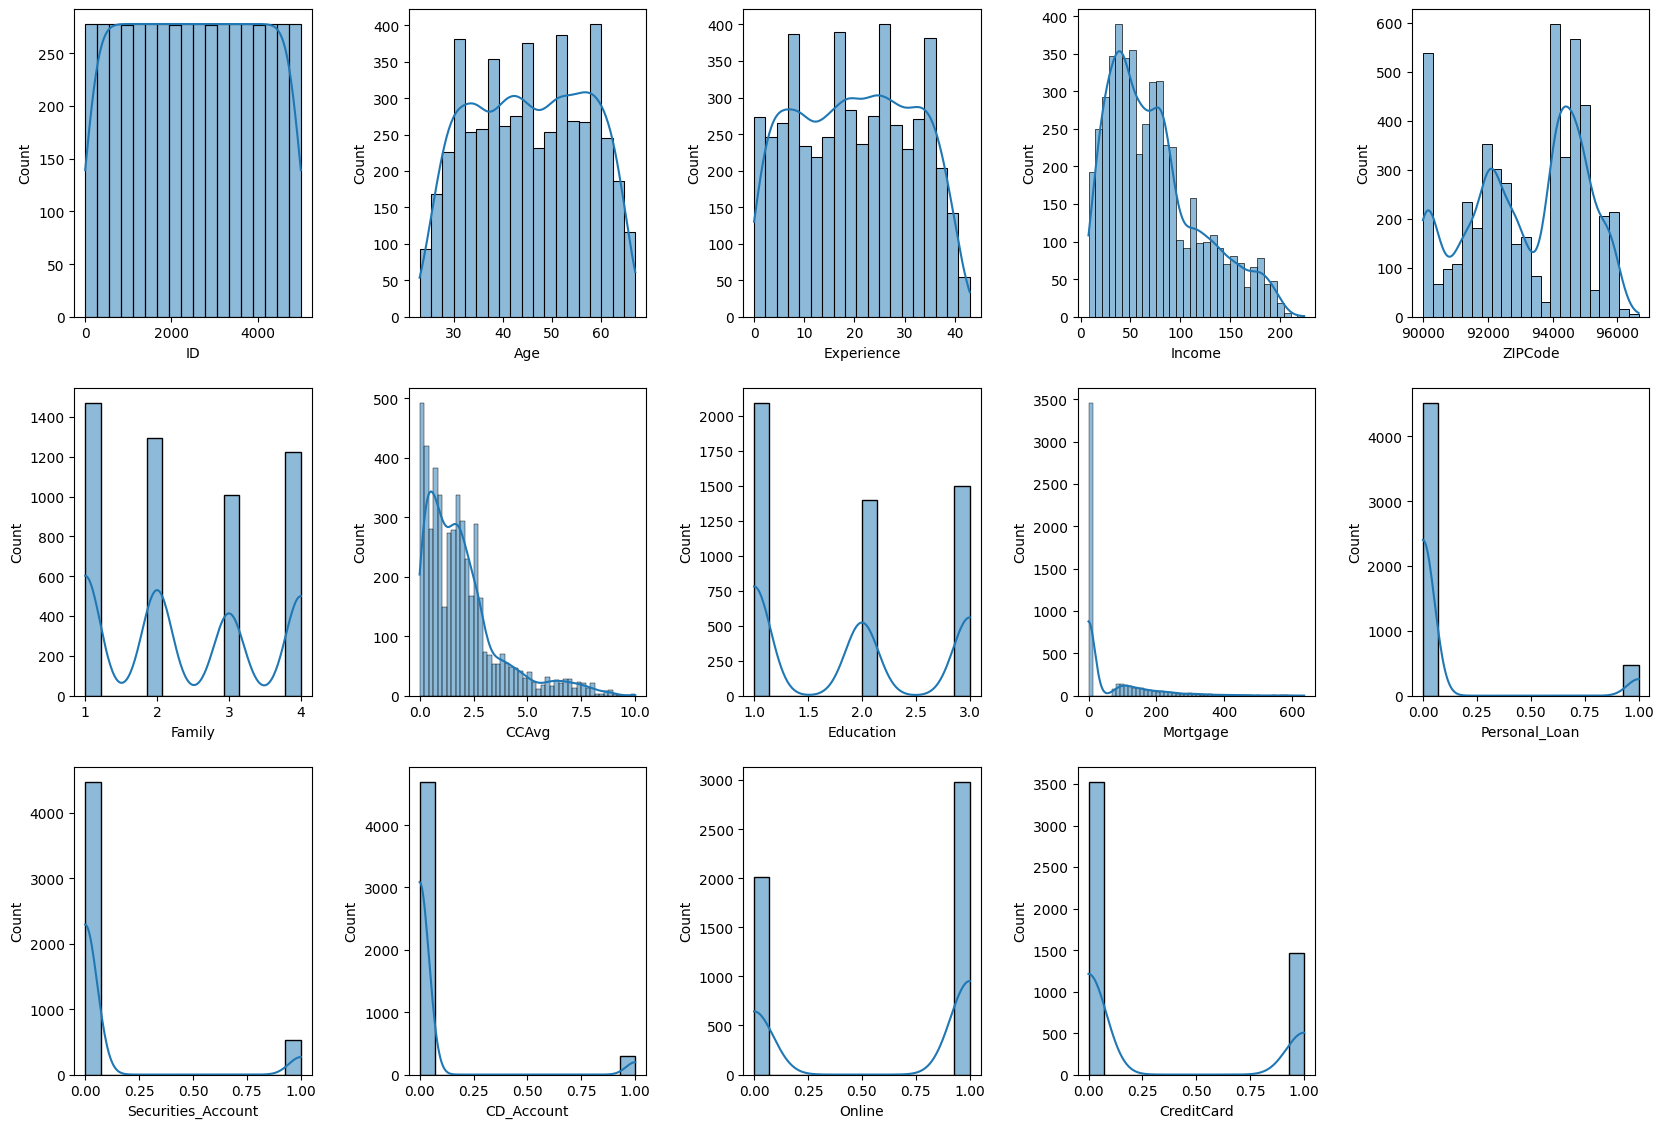

In [18]:
plt.figure(figsize=(17,15))

for i,feature in enumerate(data.columns.to_list()):
  plt.subplot(4,5,i+1)
  sns.histplot(data=data,x=feature,kde=True)
plt.tight_layout(pad=2)

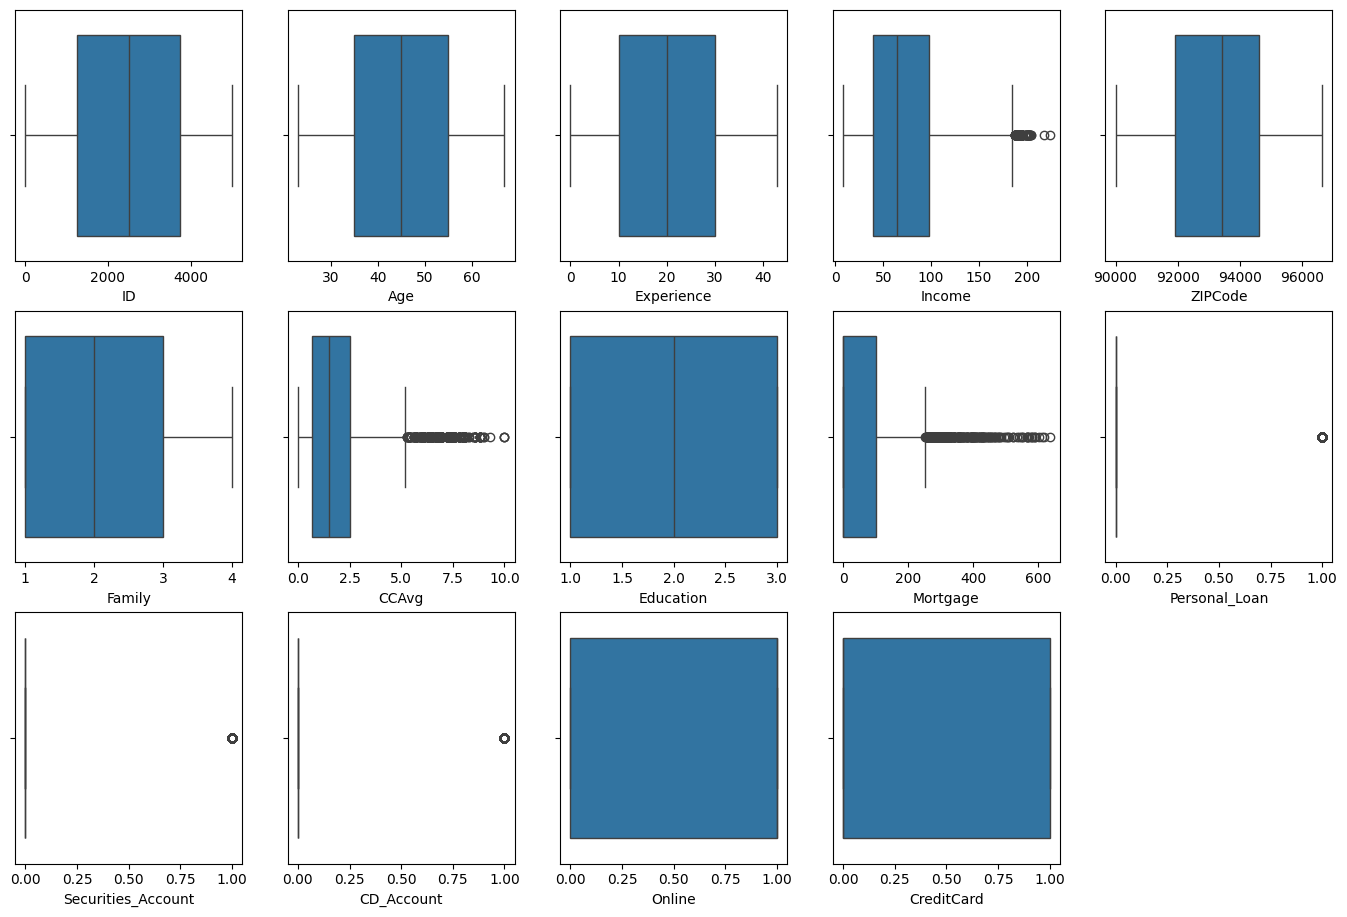

In [19]:
plt.figure(figsize=(17,15))

for i,feature in enumerate(data.columns.to_list()):
  plt.subplot(4,5,i+1)
  sns.boxplot(data=data,x=feature)

 * We observed that the outliers are largely influenced by imbalanced numerical values, often skewed toward extremes like 0 or 1(Refer Histplot). Since they are not significantly impacting the overall analysis, we have decided to continue without treating them.

 * Although we have kept the ZIPCode column for initial analysis, we plan to drop it during model building as it doesn't add meaningful value to predictions.

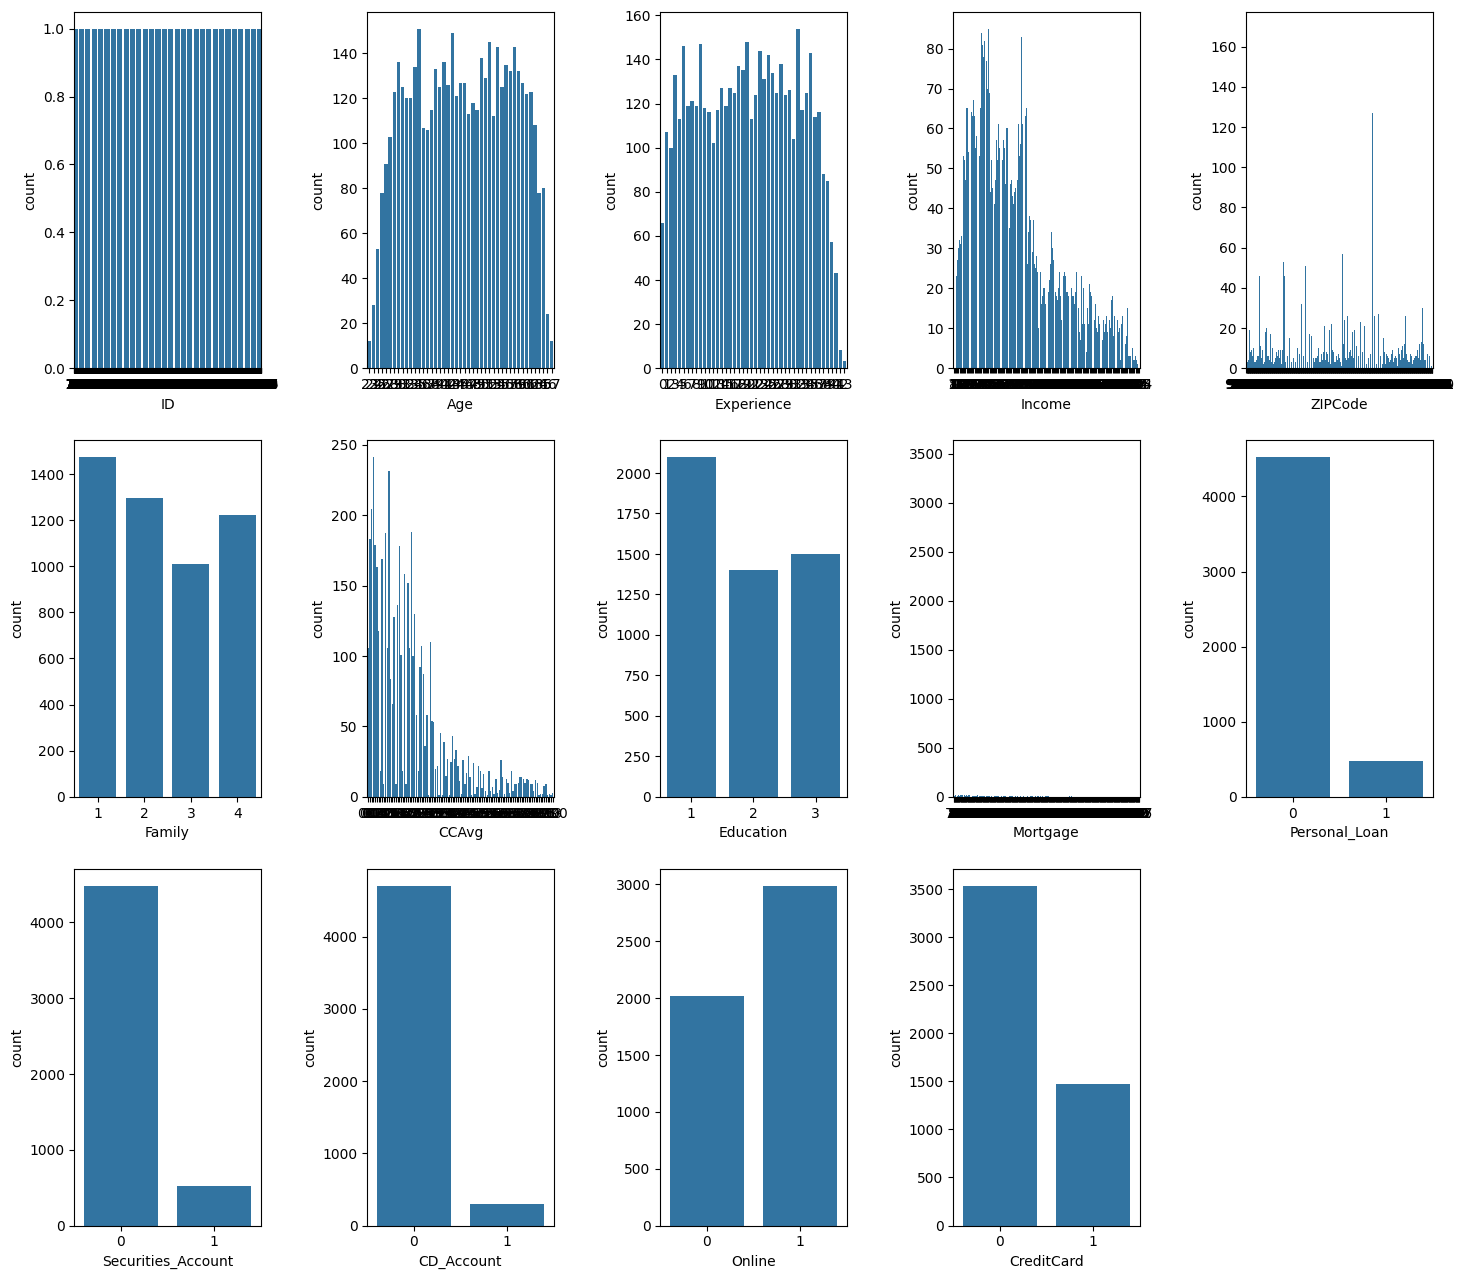

In [20]:
plt.figure(figsize=(15,17))

for i,feature in enumerate(data.columns.to_list()):
  plt.subplot(4,5,i+1)
  sns.countplot(data=data,x=feature)
  plt.tight_layout(pad=2)

- Based on the chart above, we will analyze the percentage of customers falling into each category using the following columns: ['Personal_Loan' , 'Securities_Account' , 'CD_Account' , 'CreditCard' , 'Online' , 'Education' , 'Family'], as these provide meaningful insights. Using the remaining columns may not offer sufficient or relevant information for this analysis.

Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 



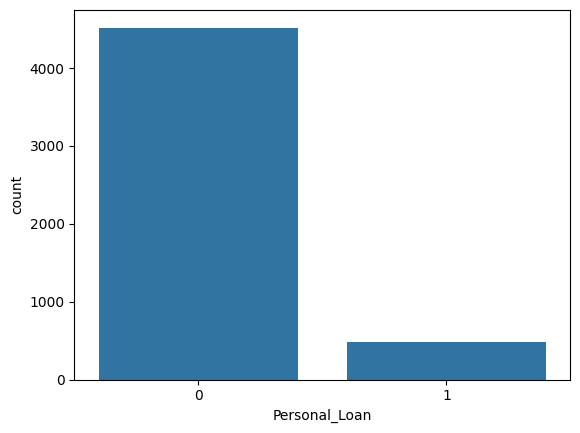

In [21]:
print(data['Personal_Loan'].value_counts(normalize=True)*100,'\n')
sns.countplot(data=data,x='Personal_Loan');

- Approximately 90% of the customers do not have a personal loan, while only about 10% have taken one.


Securities_Account
0    89.56
1    10.44
Name: proportion, dtype: float64 



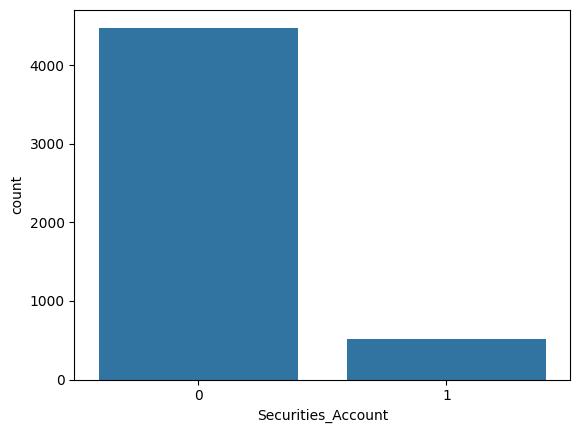

In [22]:
print(data['Securities_Account'].value_counts(normalize=True)*100,'\n')
sns.countplot(data=data,x='Securities_Account');

- Approximately 90% of the customers do not have a Securities Account, while only about 10% have taken one.

CD_Account
0    93.96
1     6.04
Name: proportion, dtype: float64 



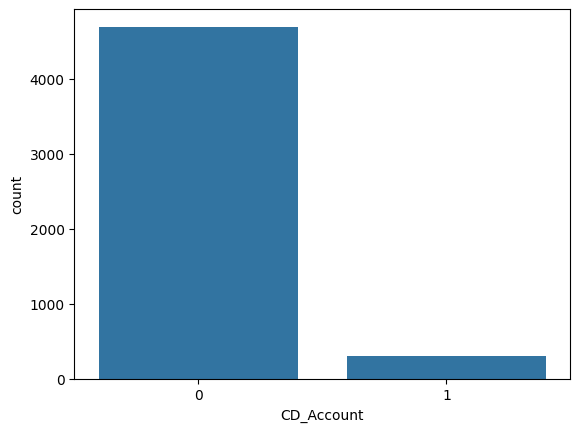

In [23]:
print(data['CD_Account'].value_counts(normalize=True)*100,'\n')
sns.countplot(data=data,x='CD_Account');

- Approximately 94% of the customers do not have a CD Account, while nearly about 6% have taken one.

Online
1    59.68
0    40.32
Name: proportion, dtype: float64 



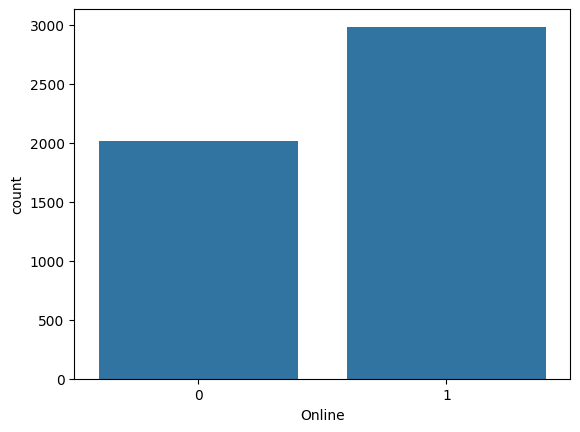

In [24]:
print(data['Online'].value_counts(normalize=True)*100,'\n')
sns.countplot(data=data,x='Online');

- Around 60% of the customers are utilizing net banking.

Family
1    29.44
2    25.92
4    24.44
3    20.20
Name: proportion, dtype: float64 



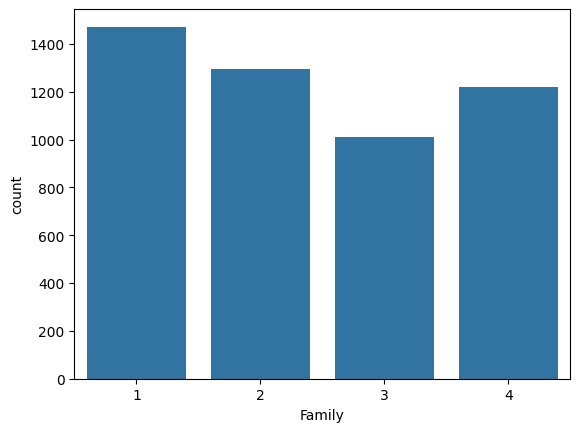

In [25]:
print(data['Family'].value_counts(normalize=True)*100,'\n')
sns.countplot(data=data,x='Family');

- Based on the above data, we can see that customers with family sizes of 1, 2, 3, and 4 are fairly evenly distributed. However, the relatively higher percentage of customers with only one member in the family raises some questions and may require further investigation.

Education
1    41.92
3    30.02
2    28.06
Name: proportion, dtype: float64 



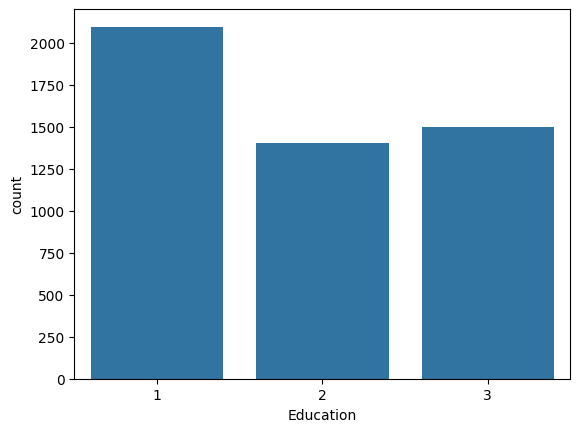

In [26]:
print(data['Education'].value_counts(normalize=True)*100,'\n')
sns.countplot(data=data,x='Education');

- Based on the chart, approximately 42% of the customers are undergraduates, while nearly 30% are either graduates or advanced professionals. This indicates that a significant portion of the customer base has a higher level of education.

CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64 



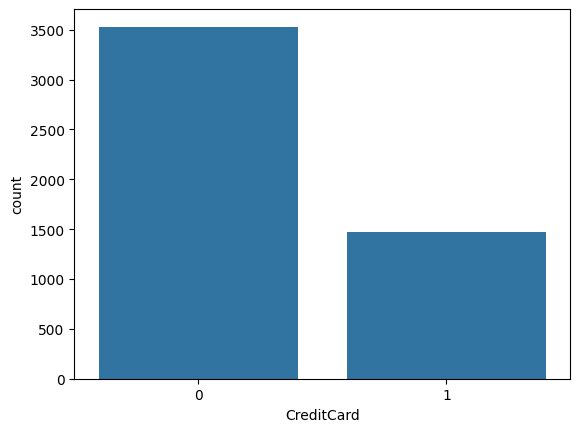

In [27]:
print(data['CreditCard'].value_counts(normalize=True)*100,'\n')
sns.countplot(data=data,x='CreditCard');

- AAround 70% of customers do not use a credit card.

### Bivariate Analysis

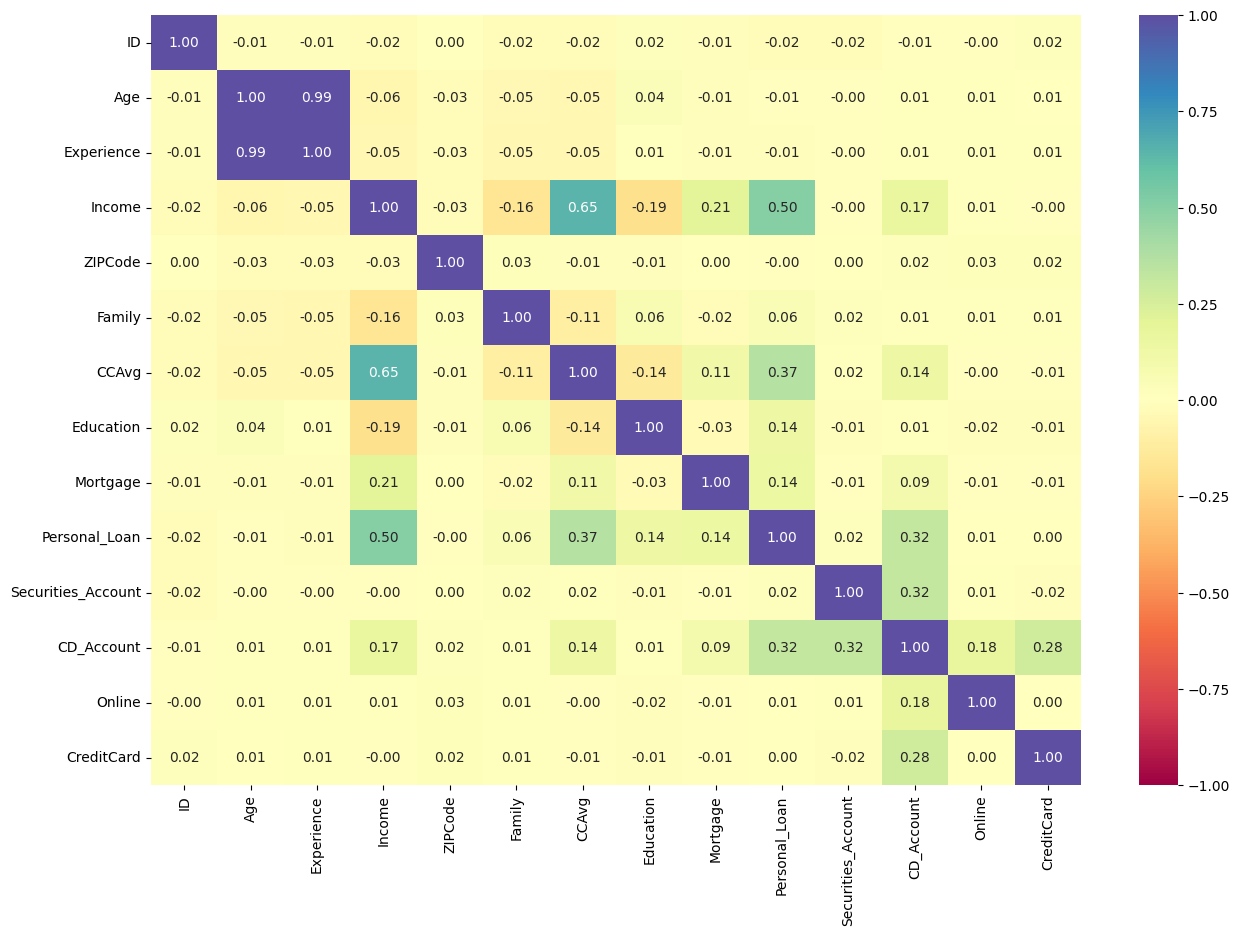

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,fmt=".2f",cmap='Spectral');

- We can observe that Personal Loan and Income have a correlation of 0.5, while Income and CCAvg share a stronger correlation of 0.65. Additionally, Experience and Age have an exceptionally high correlation of 0.99, indicating a near-perfect linear relationship between the two.

In [29]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

- The scatter plot matrix shows limited insights as most columns are binary, resulting in repetitive patterns and minimal variation between features.

Personal_Loan               0          1
Securities_Account                      
0                   90.620813   9.379187
1                   88.505747  11.494253 



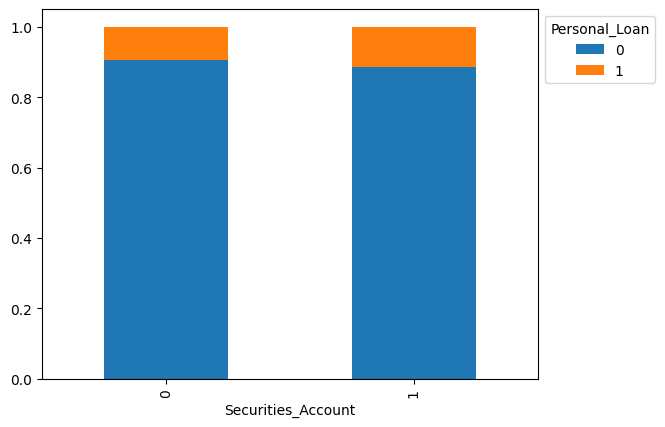

In [30]:
tab=pd.crosstab(data['Securities_Account'], data['Personal_Loan'], normalize='index')

print(tab*100,'\n')

tab.plot(kind='bar',stacked=True);
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Personal_Loan');

- Based on the table, about 9.38% of customers without a securities account have a personal loan, whereas approximately 11.49% of customers with a securities account have taken a personal loan.

Personal_Loan          0          1
CD_Account                         
0              92.762878   7.237122
1              53.642384  46.357616 



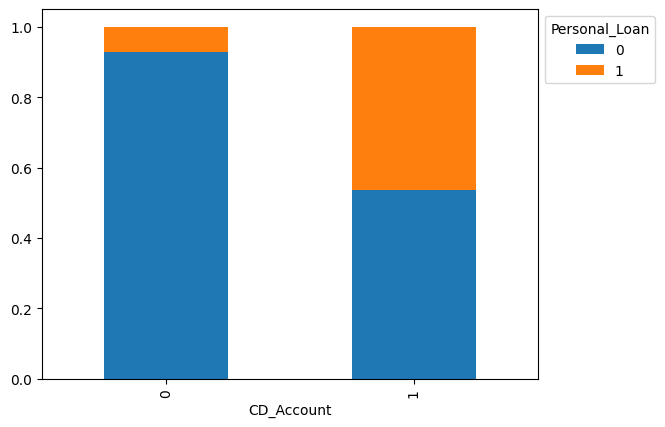

In [31]:
tab1=pd.crosstab( data['CD_Account'],data['Personal_Loan'], normalize='index')
print(tab1*100,'\n')
tab1.plot(kind='bar',stacked=True);
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Personal_Loan');

- Based on the table, about 7.24% of customers without a CD account have a personal loan, whereas approximately 46.36% of customers with a CD account have taken a personal loan.

Personal_Loan          0          1
Education                          
1              95.562977   4.437023
2              87.027798  12.972202
3              86.342438  13.657562 



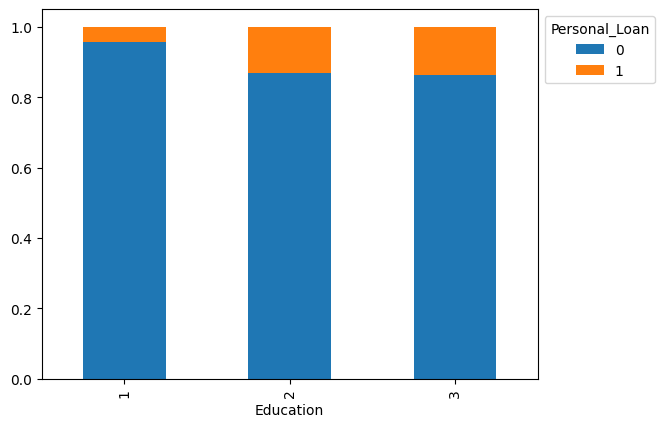

In [32]:
tab2=pd.crosstab(data['Education'],data['Personal_Loan'], normalize='index')

print(tab2*100,'\n')
tab2.plot(kind='bar',stacked=True);
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Personal_Loan');

- From the table, about 4.44% of customers with undergraduate education have taken a personal loan, while approximately 13% of graduates and advanced/professional degree holders have taken a personal loan.

Personal_Loan          0         1
Online                            
0              90.625000  9.375000
1              90.247989  9.752011 



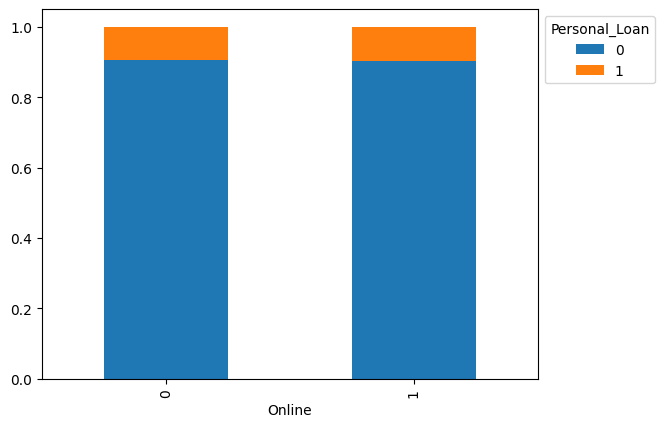

In [33]:
tab3=pd.crosstab(data['Online'],data['Personal_Loan'], normalize='index')

print(tab3*100,'\n')
tab3.plot(kind='bar',stacked=True);
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Personal_Loan');

- Based on the table, about 9.38% of customers who do not use online banking have taken a personal loan, whereas approximately 9.75% of customers who use online banking have taken a loan.

Personal_Loan          0          1
Family                             
1              92.730978   7.269022
2              91.820988   8.179012
3              86.831683  13.168317
4              89.034370  10.965630 



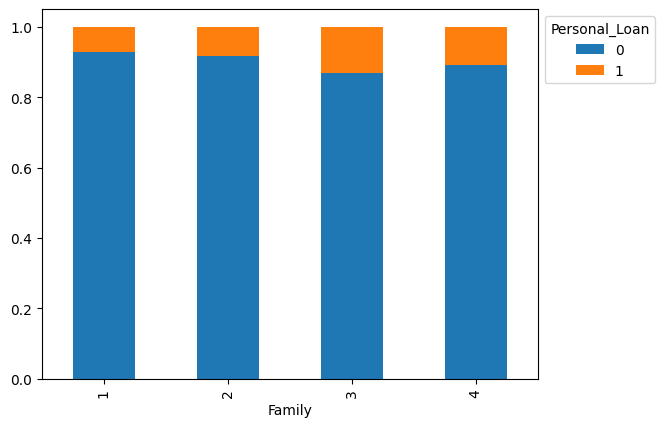

In [34]:
tab4=pd.crosstab(data['Family'],data['Personal_Loan'], normalize='index')

print(tab4*100,'\n')
tab4.plot(kind='bar',stacked=True);
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Personal_Loan');

- Based on the table, around 7.27% of customers with a family size of 1 have taken a personal loan. This increases to 8.18% for those with family size 2, 13.17% for family size 3, and 10.97% for family size 4.

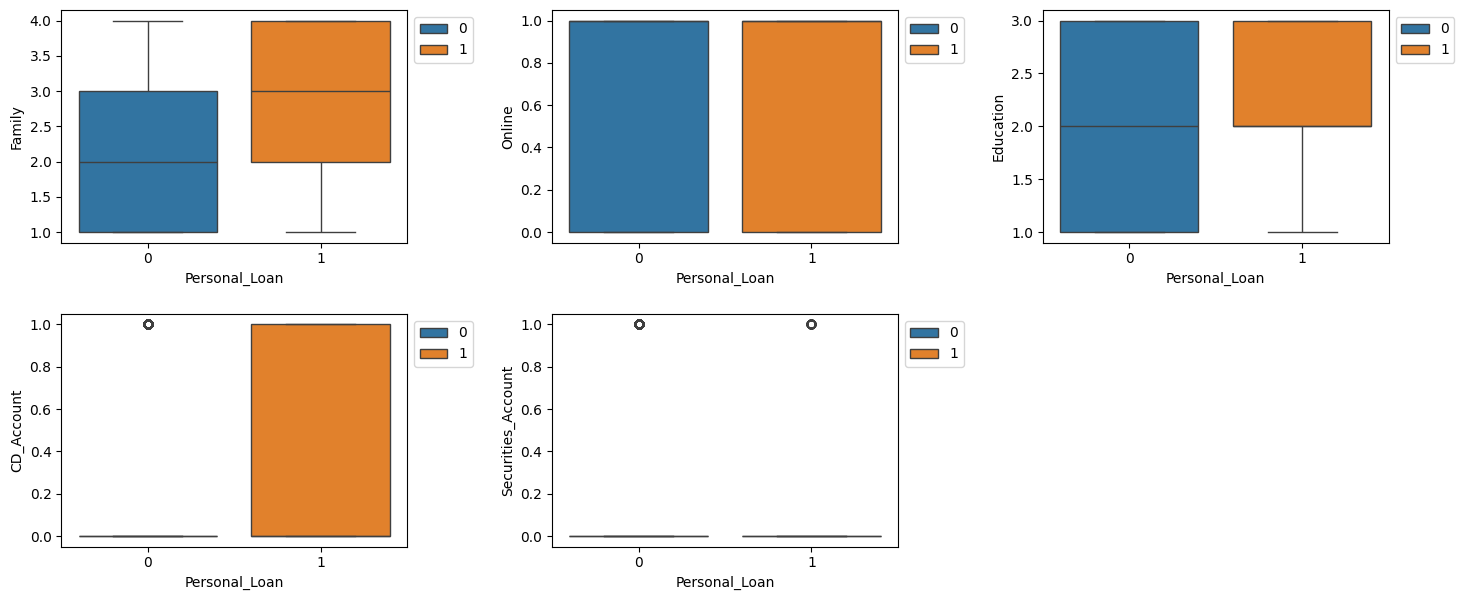

In [35]:
important_list=['Family','Online','Education','CD_Account','Securities_Account']

plt.figure(figsize=(15,12))

for i,feature in enumerate(important_list):
  plt.subplot(4,3,i+1)
  sns.boxplot(data=data,x='Personal_Loan',y=feature,hue='Personal_Loan')
  plt.legend(loc='upper left',bbox_to_anchor=(1,1))
  plt.tight_layout(pad=2)


- We see a flat line between Personal Loan and Securities Account because the majority of values are concentrated at 0. Around 90.6% of customers without a securities account did not take a personal loan, and similarly, 88.5% of those with a securities account also did not take a loan. This high concentration of zeros in both groups results in the flat appearance in the plot(Refer countplot).

- We see a flat line on the boxplot between Personal Loan = 0 and CD Account because the majority of customers without a CD account (92.8%) did not take a personal loan. However, when Personal Loan = 1, the boxplot is more visible because there's a better balance — among customers with a CD account, 46.4% took the loan. This balance creates a more meaningful distribution, making the boxplot appear for that group.

- Both Online and Securities_Account show minimal differences in personal loan acceptance. For customers using online banking, 9.75% took a loan compared to 9.38% who don’t. Similarly, 11.49% of those with a securities account took a loan, versus 9.38% without. Despite the similar percentages, the boxplot for Online appears more defined likely due to slightly more balanced data or a higher number of Online users, while the Securities plot appears flat due to a stronger skew toward 0.

# **Data Preparation for Modeling**

In [36]:
# defining the explanatory (independent) and response (dependent) variables
x=data.drop('Personal_Loan',axis=1)
y=data['Personal_Loan']

In [37]:
# splitting the data in an 80:20 ratio for train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=RS,stratify=y)
# Since we noticed an imbalance between 1 and 0 in the 'Personal Loan' variable, we used stratification to maintain the class balance between the training and test datasets.

In [38]:
print('Shape of the training set',x_train.shape,'\n')
print('Shape of the test set',x_test.shape,'\n')
print("Percentage of classes of y in training set:")
print(y_train.value_counts(normalize=True),'\n')
print("Percentage of classes of y in test set:")
print(y_test.value_counts(normalize=True))


Shape of the training set (4000, 13) 

Shape of the test set (1000, 13) 

Percentage of classes of y in training set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64 

Percentage of classes of y in test set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


# **Model Building**

### Decision Tree (sklearn default)

#### Model Evaluation

In [39]:
# creating an instance of the decision tree model
dtree1=DecisionTreeClassifier(random_state=RS)  # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_evalution (model,predictors,targets):
  """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables

  pred=model.predict(predictors)
  Recall=recall_score(targets,pred)
  Precision=precision_score(targets,pred)
  F1=f1_score(targets,pred)
  Accuracy=accuracy_score(targets,pred)

  df_evaluation=pd.DataFrame({'Recall':Recall,'Precision':Precision,'F1':F1,'Accuracy':Accuracy},index=[0])

  return df_evaluation

In [41]:
def confusion_matrix_plot (model,predictors,targets):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
  # Predict the target values using the provided model and predictors
    y_pred=model.predict(predictors)

  # Compute the confusion matrix comparing the true target values with the predicted values
    cm=confusion_matrix(targets,y_pred)

  # Create labels for each cell in the confusion matrix with both count and percentage
    label=np.asarray([['{0:0.0f}'.format(item)+'\n{0:.2%}'.format(item/cm.flatten().sum())]for item in cm.flatten()]).reshape(2,2)

  # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm,annot=label,fmt='',cmap='Spectral')
  # Add a label to the y-axis
    plt.ylabel("True label")

  # Add a label to the x-axis
    plt.xlabel("Predicted label")

In [42]:
dtree1_train = model_performance_evalution(dtree1,x_train,y_train)
dtree1_train

,Recall,Precision,F1,Accuracy
0,1.0,1.0,1.0,1.0


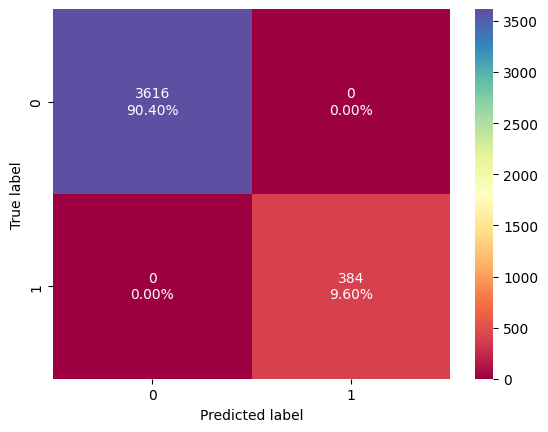

In [43]:
confusion_matrix_plot(dtree1,x_train,y_train)

In [44]:
dtree1_test = model_performance_evalution(dtree1,x_test,y_test)
dtree1_test

,Recall,Precision,F1,Accuracy
0,0.958333,0.87619,0.915423,0.983


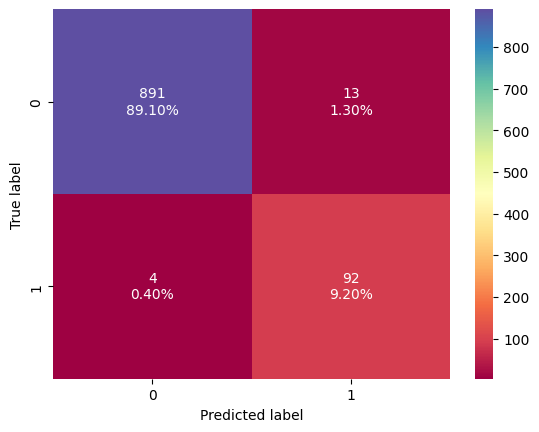

In [45]:
confusion_matrix_plot(dtree1,x_test,y_test)

- Although the model achieves perfect performance on the training data, the drop in precision and F1-score on the test set suggests that it may be overfitting and not generalizing as well as expected. Therefore, while the test accuracy is high, we cannot conclude that this is a good or robust model without further validation or pruning.

#### Visualizing the Decision Tree

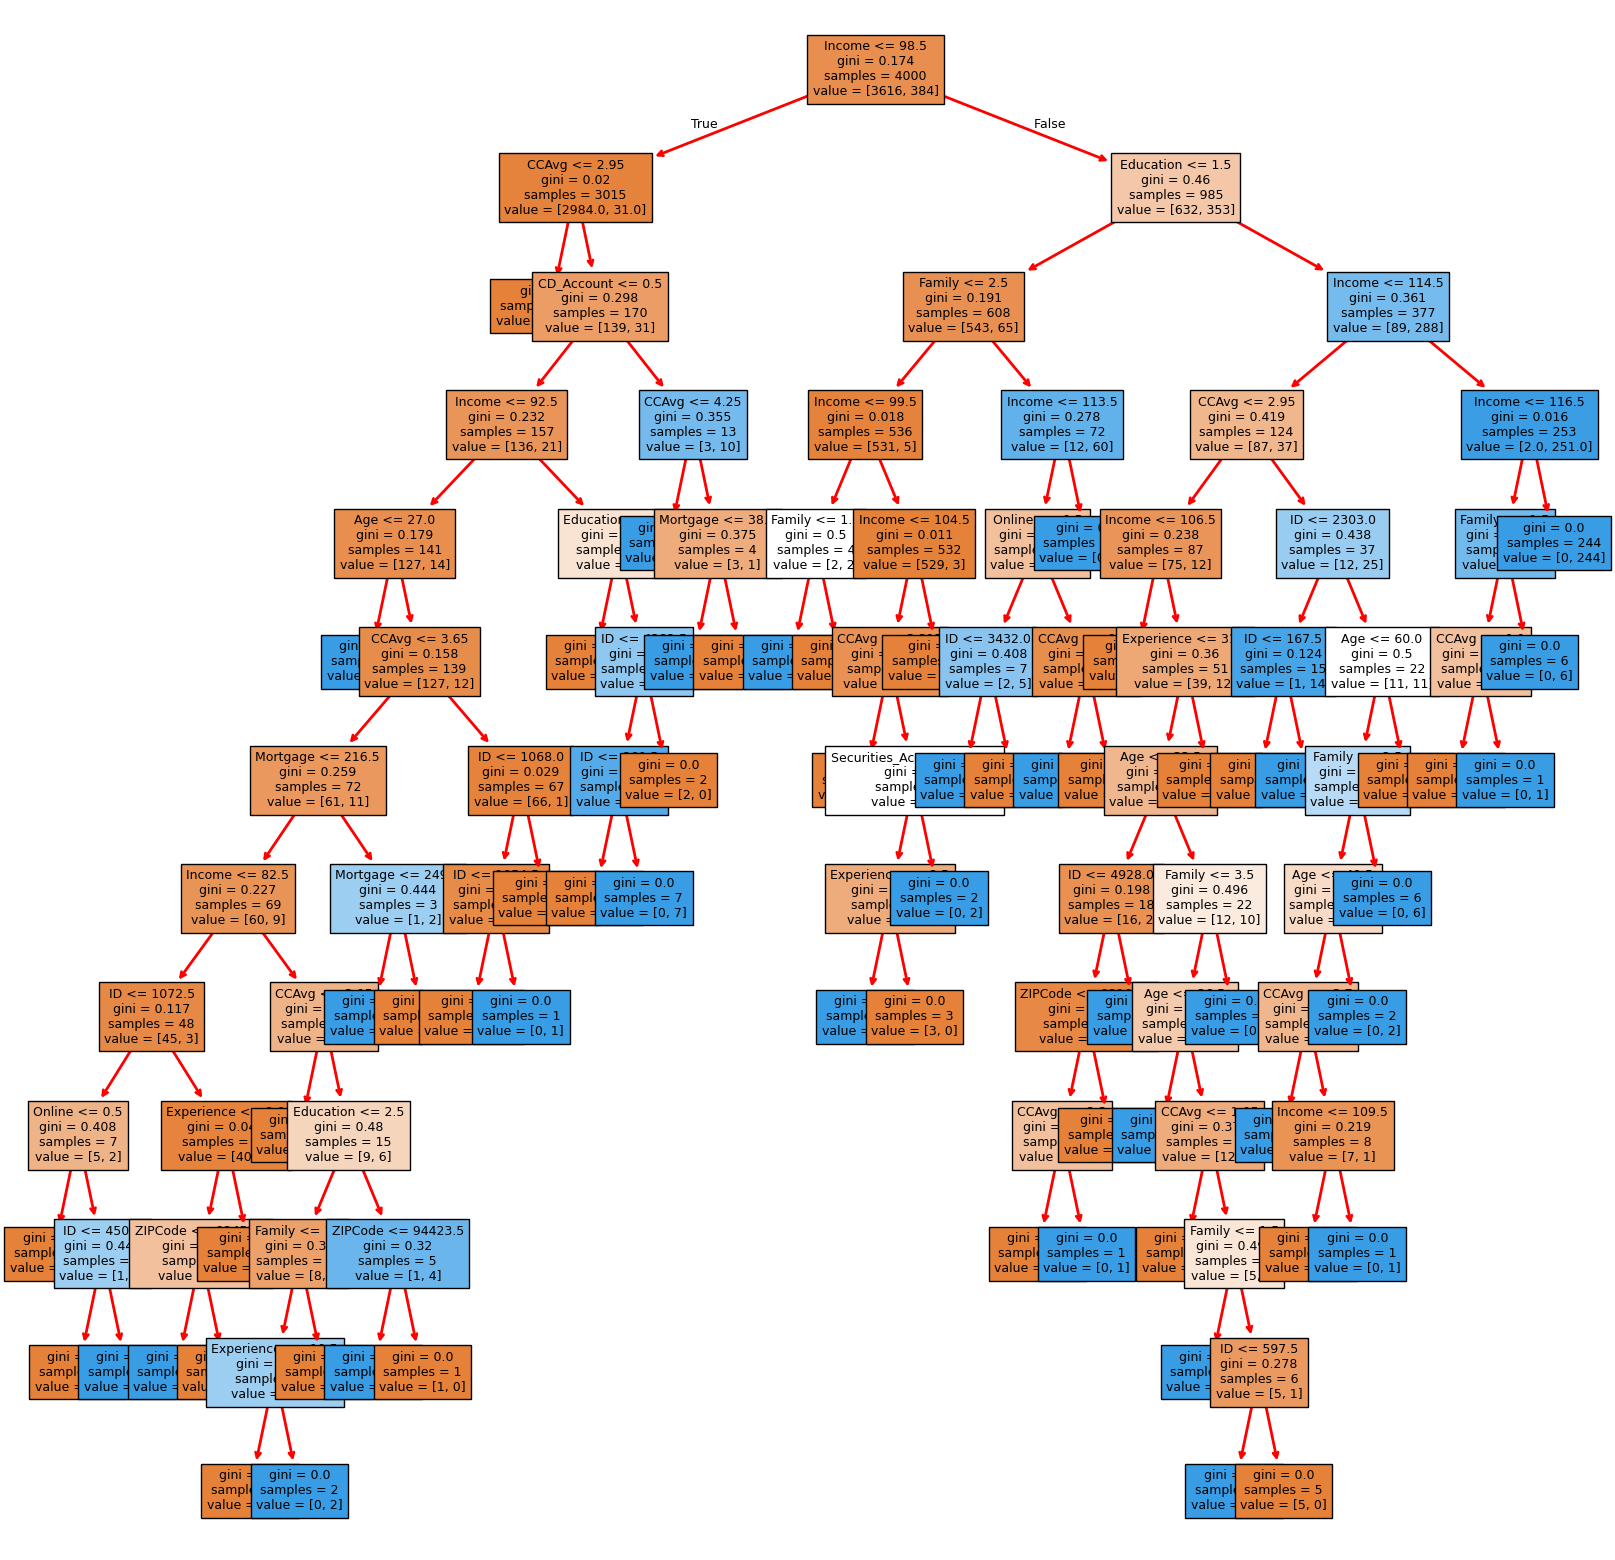

In [46]:
# list of feature names in X_train
feature_names = list(x_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("red")    # set arrow color to black
        arrow.set_linewidth(2)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [47]:
 # printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- ID <= 1072.50
|   |   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |   |--- ID <= 450.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- ID >  450.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- ID >  107

In [48]:
node_count=dtree1.tree_.node_count
depth = dtree1.tree_.max_depth
print('The tree has a total of {} nodes and a depth of {}'.format(node_count, depth))

The tree has a total of 123 nodes and a depth of 12


### Decision Tree (Pre-pruning)-Wide Range

In [107]:
# Define the hyperparameter ranges for tuning
# Since this is a learning project, I'm not focused on saving time.
# I'm using a wider and more detailed range to help find the best possible model.

max_depth_values = np.arange(2, 13) # Exploring depths from 2 to 12
max_leaf_nodes_values = np.arange(10, 101) #Trying all values from 10 to 100 for leaf nodes
min_samples_split_values = np.arange(10, 50) # Values from 10 to 50, every single one

best_estimator = None
best_test_f1 = 0  # Focus on highest test F1 score

for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=RS
            )

            estimator.fit(x_train, y_train)

            y_pred_test = estimator.predict(x_test)
            test_f1 = f1_score(y_test, y_pred_test)

            if test_f1 > best_test_f1:
                best_test_f1 = test_f1
                best_estimator = estimator

- Why Not Just Minimize the F1 Score Difference?

  1.abs(train_f1 - test_f1) is useful to detect overfitting, but…

  2.A small difference can happen when both scores are bad (e.g., 0.1 vs 0.1).

  3.That doesn’t mean the model is good — just equally bad on train and test.

In [108]:
dtree2=best_estimator
dtree2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=np.int64(4), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(10), random_state=42)

In [109]:
dtree2_train = model_performance_evalution(dtree2,x_train,y_train)
dtree2_train

,Recall,Precision,F1,Accuracy
0,0.885417,0.952381,0.917679,0.98475


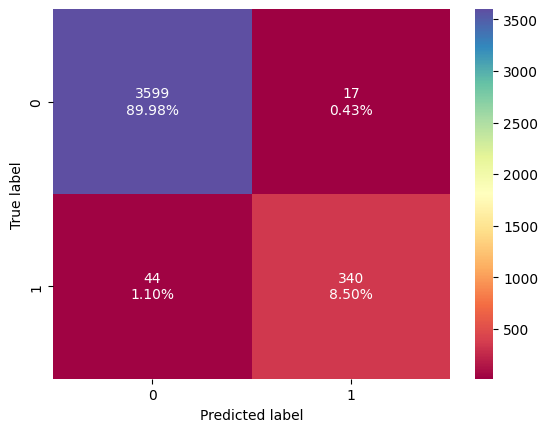

In [110]:
confusion_matrix_plot(dtree2,x_train,y_train)

In [111]:
dtree2_test = model_performance_evalution(dtree2,x_test,y_test)
dtree2_test

,Recall,Precision,F1,Accuracy
0,0.958333,0.948454,0.953368,0.991


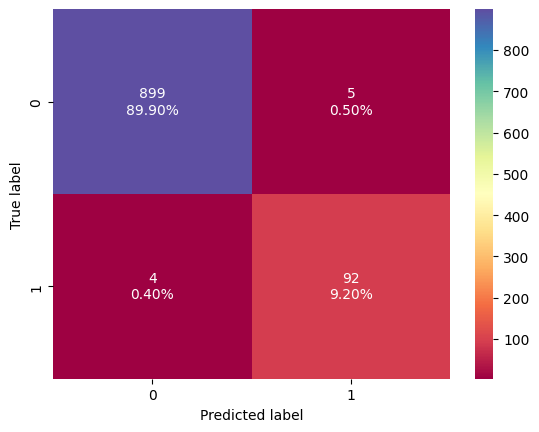

In [112]:
confusion_matrix_plot(dtree2,x_test,y_test)

- Based on the above tables, the training and test F1 scores are fairly close (0.9177 vs 0.9534), which suggests that the model is generalizing well without significant overfitting or underfitting.

#### Visualizing the Decision Tree

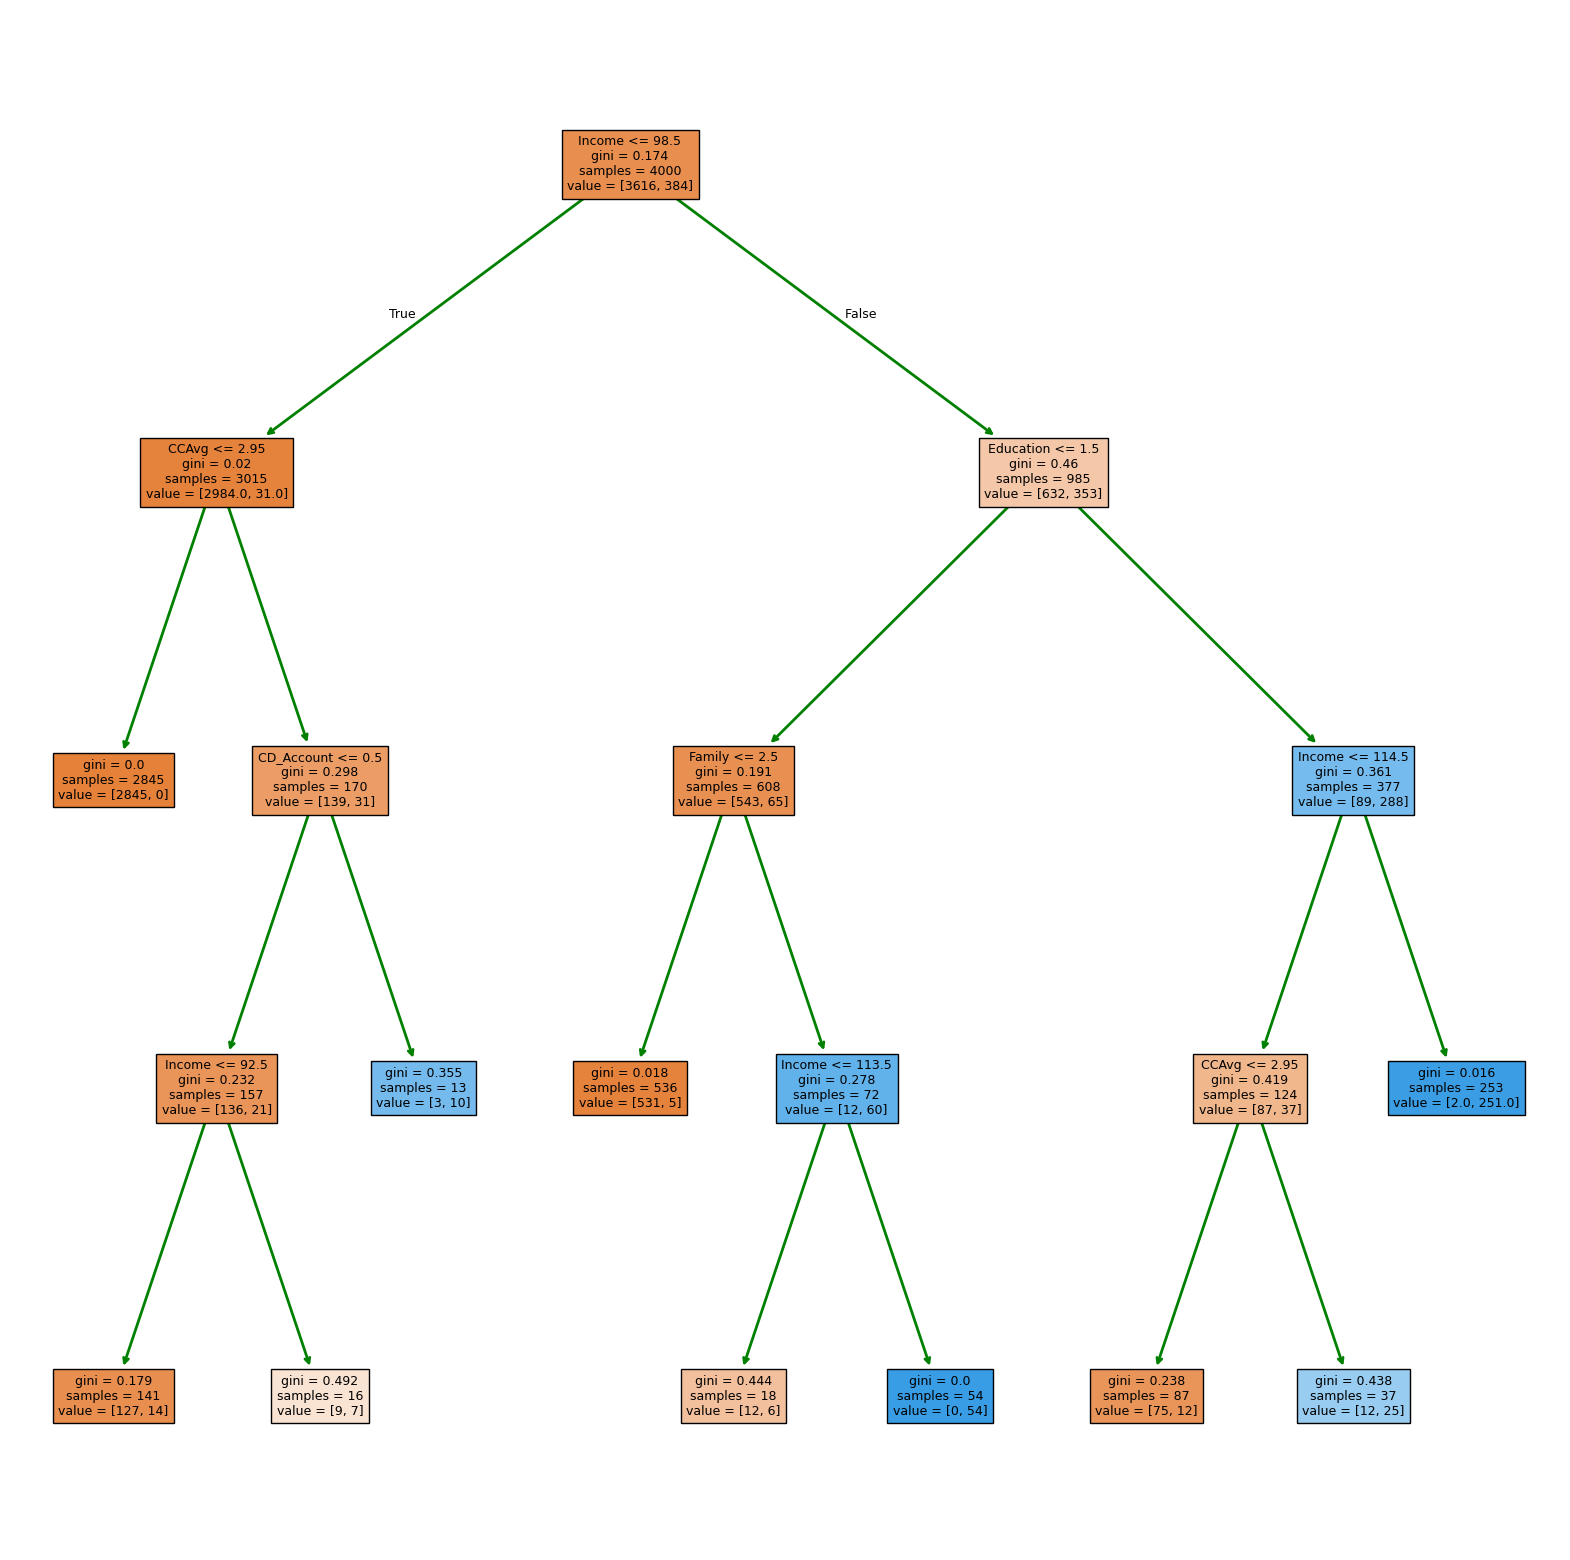

In [113]:
plt.figure(figsize=(20,20))

out1=tree.plot_tree(dtree2,
                   feature_names=feature_names,
                   fontsize=9,
                   filled=True,
                   class_names=None,
                   node_ids=False)

for o in out1:
  arrow1=o.arrow_patch
  if arrow1 is not None:
    arrow1.set_edgecolor('green')
    arrow1.set_linewidth(2)

plt.show()

In [114]:
print(tree.export_text(dtree2,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [127.00, 14.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- weights: [9.00, 7.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--

In [115]:
print('The pre-pruned tree has {} nodes and a depth of {}'.format(dtree2.tree_.node_count, dtree2.tree_.max_depth))

The pre-pruned tree has 19 nodes and a depth of 4


### Decision Tree (Pre-pruning)-Min Range

In [172]:
# define the parameters of the tree to iterate over
max_depth_values_1 = np.arange(2, 11, 2)
max_leaf_nodes_values_1 = np.arange(10, 51, 10)
min_samples_split_values_1 = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator_1 = None
best_score_diff_1 = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth_1 in max_depth_values_1:
    for max_leaf_nodes_1 in max_leaf_nodes_values_1:
        for min_samples_split_1 in min_samples_split_values_1:

            # initialize the tree with the current set of parameters
            estimator_1 = DecisionTreeClassifier(
                max_depth=max_depth_1,
                max_leaf_nodes=max_leaf_nodes_1,
                min_samples_split=min_samples_split_1,
                random_state=RS
            )

            # fit the model to the training data
            estimator_1.fit(x_train, y_train)

            # make predictions on the training and test sets
            y_train_pred_1 = estimator_1.predict(x_train)
            y_test_pred_1 = estimator_1.predict(x_test)

            # calculate F1 scores for training and test sets
            train_f1_score_1 = f1_score(y_train, y_train_pred_1)
            test_f1_score_1 = f1_score(y_test, y_test_pred_1)

            # calculate the absolute difference between training and test F1 scores
            score_diff_1 = abs(train_f1_score_1 - test_f1_score_1)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff_1 < best_score_diff_1:
                best_score_diff_1 = score_diff_1
                best_estimator_1 = estimator_1

In [173]:
dtree2_1=best_estimator_1
dtree2_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=np.int64(2), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(10), random_state=42)

In [174]:
dtree2_1_train = model_performance_evalution(dtree2_1,x_train,y_train)
dtree2_1_train

,Recall,Precision,F1,Accuracy
0,0.75,0.763926,0.756899,0.95375


- When we select the best model based on the smallest absolute difference between training and test F1 scores, we might unintentionally ignore models that actually perform better overall.

    For example, imagine one model gives:

    Train F1 = 0.81

    Test F1 = 0.82 → Difference = 0.01 ✅ (looks good)

    But another model gives:

    Train F1 = 0.91

    Test F1 = 0.75 → Difference = 0.16 ❌ (larger gap)

Even though the second model has a much higher test F1, it gets ignored due to its larger gap — and we end up choosing a model with a lower F1 score just because the train-test scores are closer.

This could be why we're ending up with a final F1 score like 0.75, even though a model with 0.82+ existed — it just had a larger training score.

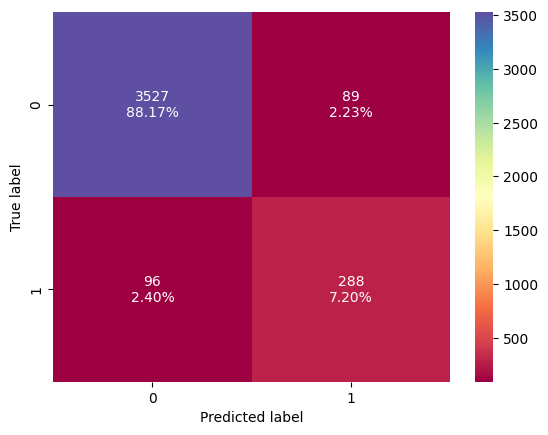

In [175]:
confusion_matrix_plot(dtree2_1,x_train,y_train)

In [176]:
dtree2_1_test = model_performance_evalution(dtree2_1,x_test,y_test)
dtree2_1_test

,Recall,Precision,F1,Accuracy
0,0.78125,0.714286,0.746269,0.949


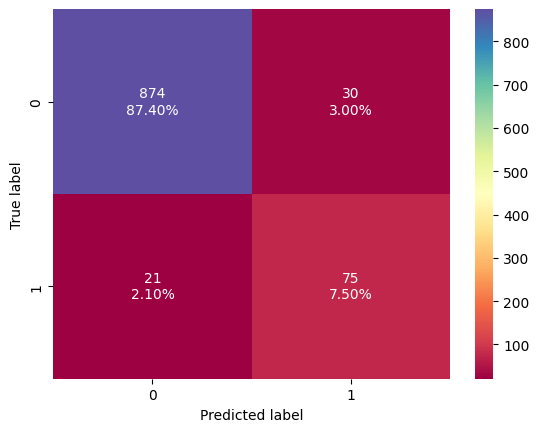

In [177]:
confusion_matrix_plot(dtree2_1,x_test,y_test)

#### Visualizing the Decision Tree

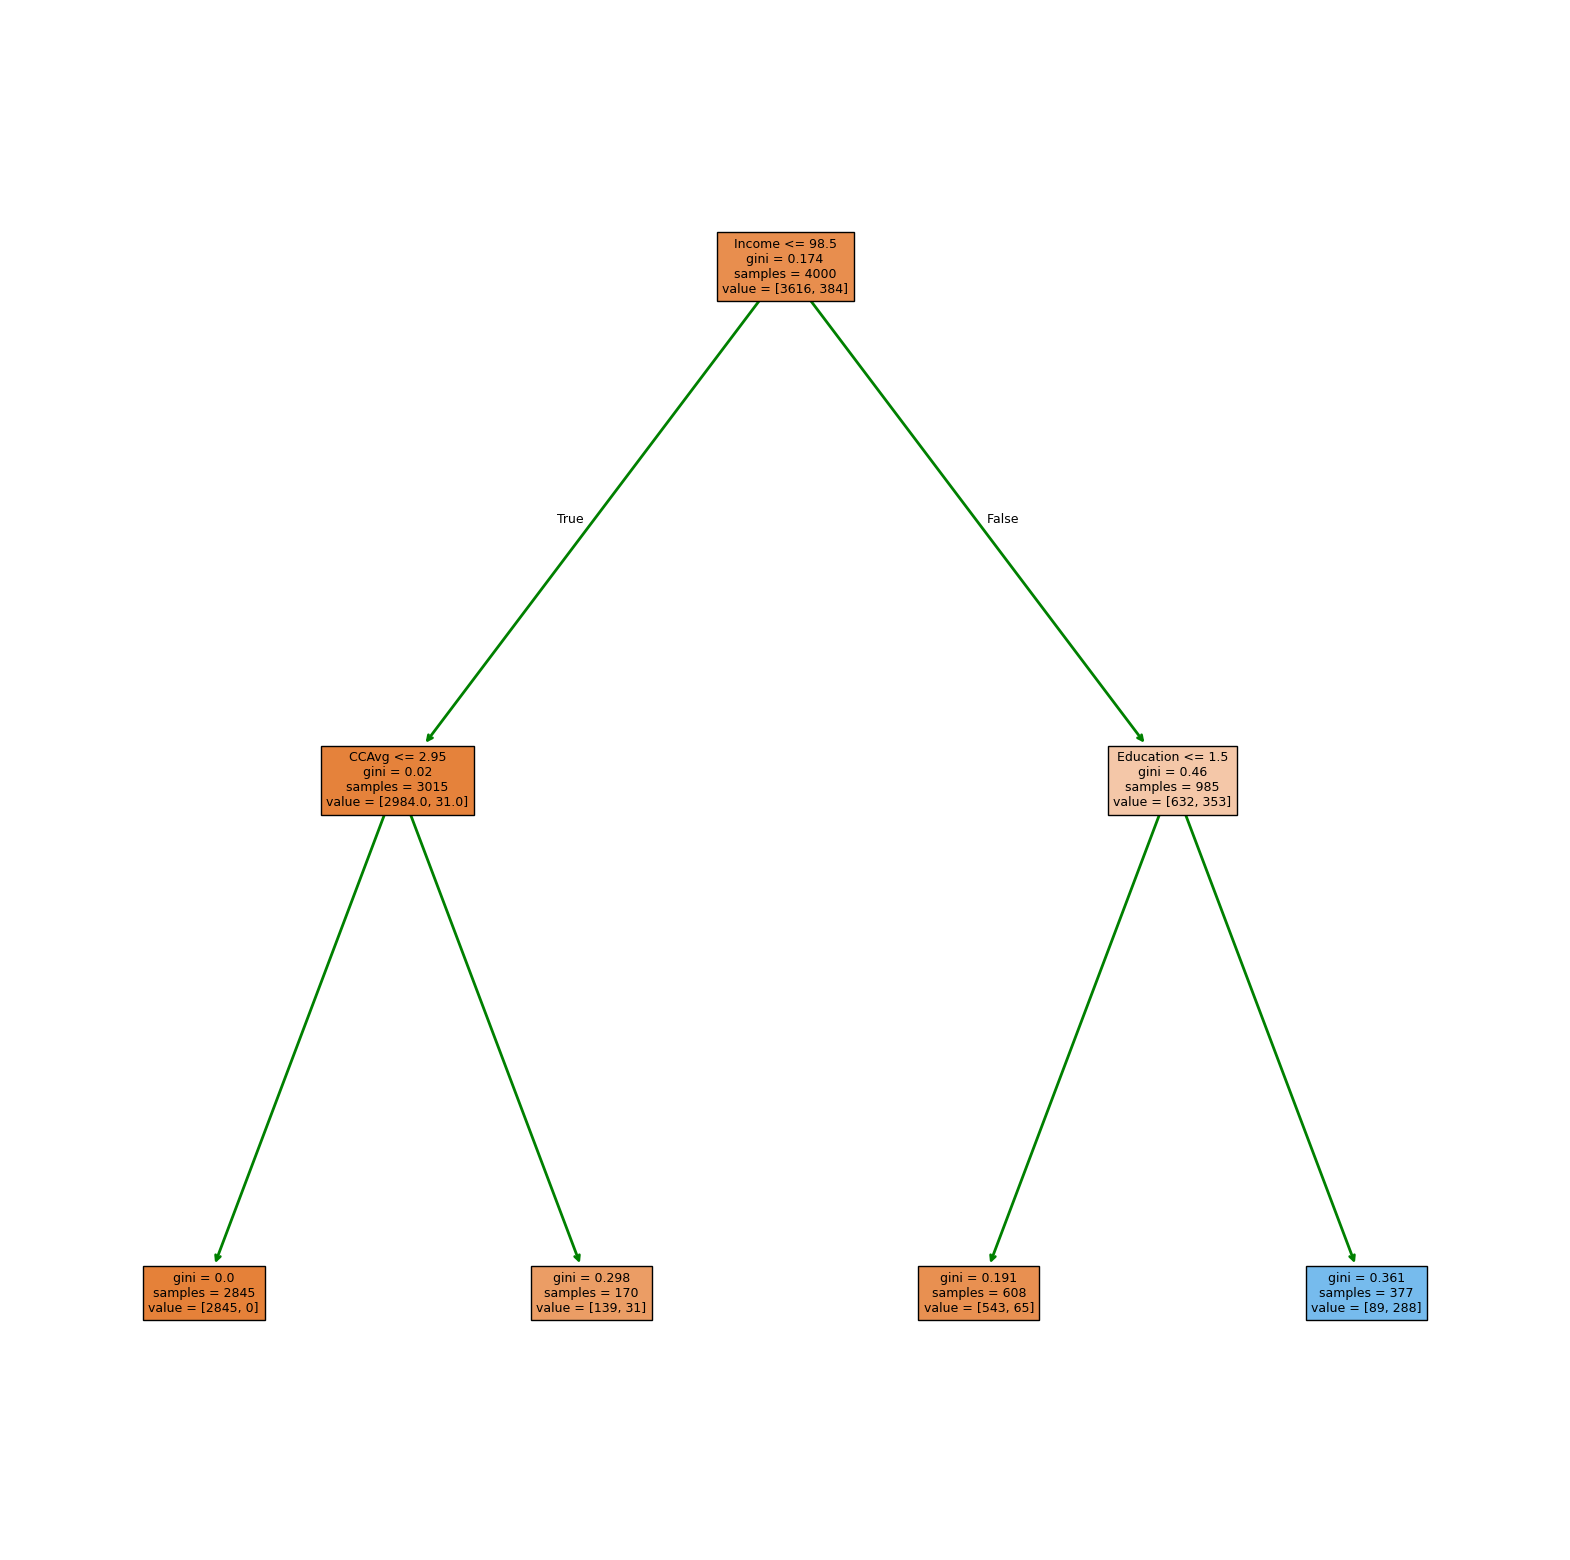

In [178]:
plt.figure(figsize=(20,20))

out1_1=tree.plot_tree(dtree2_1,
                   feature_names=feature_names,
                   fontsize=9,
                   filled=True,
                   class_names=None,
                   node_ids=False)

for o in out1_1:
  arrow1_1=o.arrow_patch
  if arrow1_1 is not None:
    arrow1_1.set_edgecolor('green')
    arrow1_1.set_linewidth(2)

plt.show()

In [179]:
print(tree.export_text(dtree2_1,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [139.00, 31.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- weights: [543.00, 65.00] class: 0
|   |--- Education >  1.50
|   |   |--- weights: [89.00, 288.00] class: 1



In [180]:
print('The pre-pruned tree(Mid_range) has {} nodes and a depth of {}'.format(dtree2_1.tree_.node_count, dtree2_1.tree_.max_depth))

The pre-pruned tree(Mid_range) has 7 nodes and a depth of 2


### Decision Tree (Post-pruning)-Max_F1 Score

In [116]:
clf=DecisionTreeClassifier(random_state=RS)
path=clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas
impurities=path.impurities

- We first grow a full decision tree on the training data. Then we use cost_complexity_pruning_path to get a list of ccp_alphas and their corresponding impurities. Each ccp_alpha acts as a threshold: if a node’s information gain is less than the ccp_alpha, that node is pruned. This helps remove parts of the tree that don’t improve performance much, reducing overfitting and improving generalization.

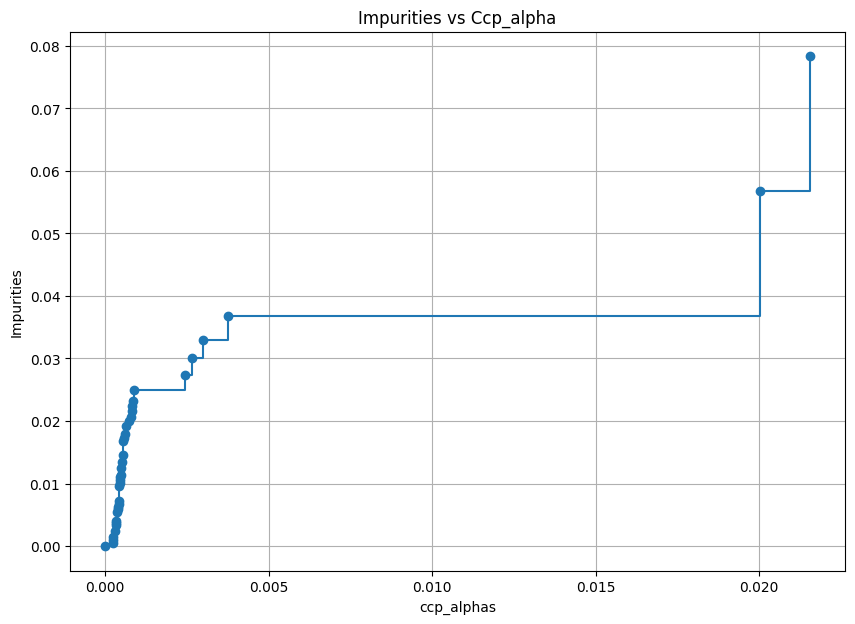

In [117]:
# Create a figure
fig,ax=plt.subplots(figsize=(10,7))

ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o',drawstyle="steps-post")

plt.grid(True)

ax.set_xlabel('ccp_alphas')  # x-axis label can be set using either ax.set_xlabel or plt.xlabel
plt.ylabel('Impurities')     # y-axis label can also be set using ax.set_ylabel or plt.ylabel
plt.title('Impurities vs Ccp_alpha')
plt.show()

- The last value in ccp_alphas and impurites represents the root node, so we exclude it using [:-1] since it's not needed for plotting.

In [60]:
clfs=[]

for ccp_alpha in ccp_alphas:
  clf=DecisionTreeClassifier(ccp_alpha=ccp_alpha,random_state=RS)
  clf.fit(x_train,y_train)
  clfs.append(clf)

- We use a for loop to create and train a separate decision tree for each ccp_alpha value. For every ccp_alpha, we create a new DecisionTreeClassifier, apply the pruning based on that alpha, and fit it on the training data. This means each model in the clfs list is a pruned version of the full tree, with the amount of pruning increasing as ccp_alpha increases.

In [61]:
print('After full pruning, the tree has {} nodes, a maximum depth of {}, and a corresponding ccp_alpha of {}.'.format(clfs[-1].tree_.node_count, clfs[-1].tree_.max_depth, ccp_alphas[-1]))

print('The unpruned (or least pruned) tree has {} nodes, a maximum depth of {}, and a corresponding ccp_alpha of {}.'.format(clfs[0].tree_.node_count, clfs[0].tree_.max_depth, ccp_alphas[0]))

After full pruning, the tree has 1 nodes, a maximum depth of 0, and a corresponding ccp_alpha of 0.04760359071815693.
The unpruned (or least pruned) tree has 123 nodes, a maximum depth of 12, and a corresponding ccp_alpha of 0.0.


In [62]:
clfs=clfs[:-1]
ccp_alphas=ccp_alphas[:-1]

-
We exclude the last values from both clfs and ccp_alphas using slicing ([:-1]). This is done because the last ccp_alpha usually corresponds to a trivial tree with only the root node (i.e., everything is pruned). To avoid including this overly simple and non-informative model, we remove it. Also, to prevent losing the original list during repeated runs, this step is typically run separately.

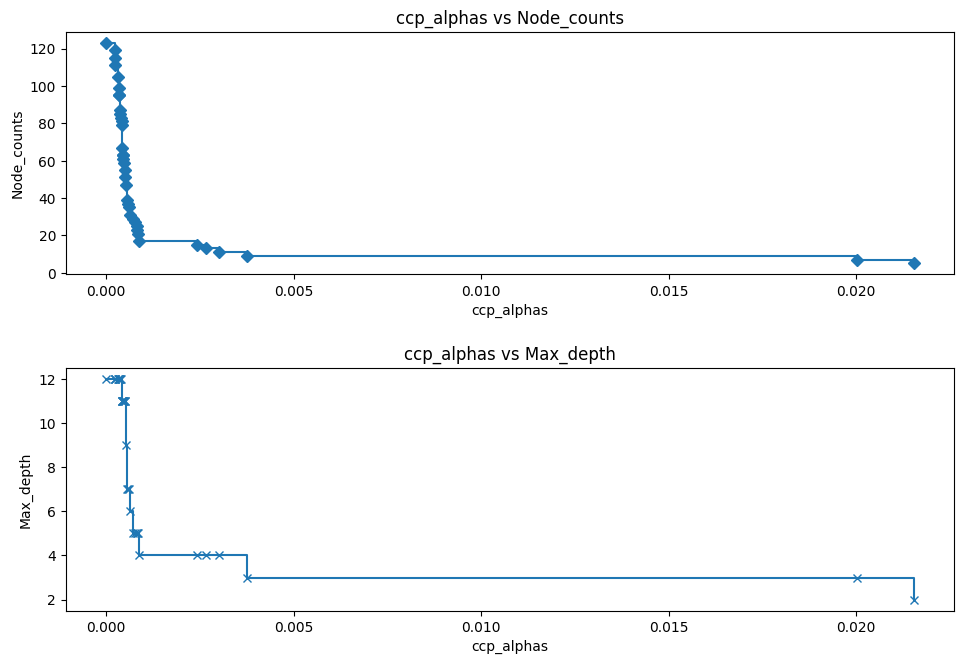

In [63]:
node_counts = [clf.tree_.node_count for clf in clfs]         # Get number of nodes in each pruned tree
max_depth_counts = [clf.tree_.max_depth for clf in clfs]     #️ Get depth of each pruned tree

fig, ax = plt.subplots(2, 1, figsize=(10, 7)) # Create a 2x1 subplot layout for comparison

ax[0].plot(ccp_alphas, node_counts, marker='D', drawstyle='steps-post') #️Plot ccp_alpha vs node count (diamond markers)
ax[0].set_xlabel('ccp_alphas') #️ X-axis label for first plot
ax[0].set_ylabel('Node_counts')  #Y-axis label for first plot
ax[0].set_title('ccp_alphas vs Node_counts') #️ Title for first plot

ax[1].plot(ccp_alphas, max_depth_counts, marker='x', drawstyle='steps-post')# Plot ccp_alpha vs tree depth (x markers)
ax[1].set_xlabel('ccp_alphas')#️ X-axis label for second plot
ax[1].set_ylabel('Max_depth') #️ Y-axis label for second plot
ax[1].set_title('ccp_alphas vs Max_depth') #️ Title for second plot

plt.tight_layout(pad=2) #️ Adjust layout spacing between plots
plt.show()  #️ Display the plots


- As the ccp_alpha values increase, both the node count and the depth of the decision trees decrease. This is because higher ccp_alpha values lead to more pruning. Specifically, nodes with information gain less than the corresponding ccp_alpha are pruned, resulting in simpler trees with fewer nodes and shallower depth.

In [64]:
train_f1_scores = []
#️ Initialize an empty list to store F1 scores for training data

for clf in clfs:
    #️ Loop through each pruned decision tree in the clfs list

    y_train_pred = clf.predict(x_train)
    #️ Predict the training labels using the current model

    f1_scores_train = f1_score(y_train, y_train_pred)
    #️ Calculate the F1 score for training predictions

    train_f1_scores.append(f1_scores_train)
    #️ Append the F1 score to the train_f1_scores list


In [65]:
test_f1_scores = []
#️⃣ Initialize an empty list to store F1 scores for test data

for clf in clfs:
    #️⃣ Loop through each pruned decision tree in the clfs list

    y_test_pred = clf.predict(x_test)
    #️⃣ Predict the test labels using the current model

    f1_scores_test = f1_score(y_test, y_test_pred)
    #️⃣ Calculate the F1 score for test predictions

    test_f1_scores.append(f1_scores_test)
    #️⃣ Append the F1 score to the test_f1_scores list

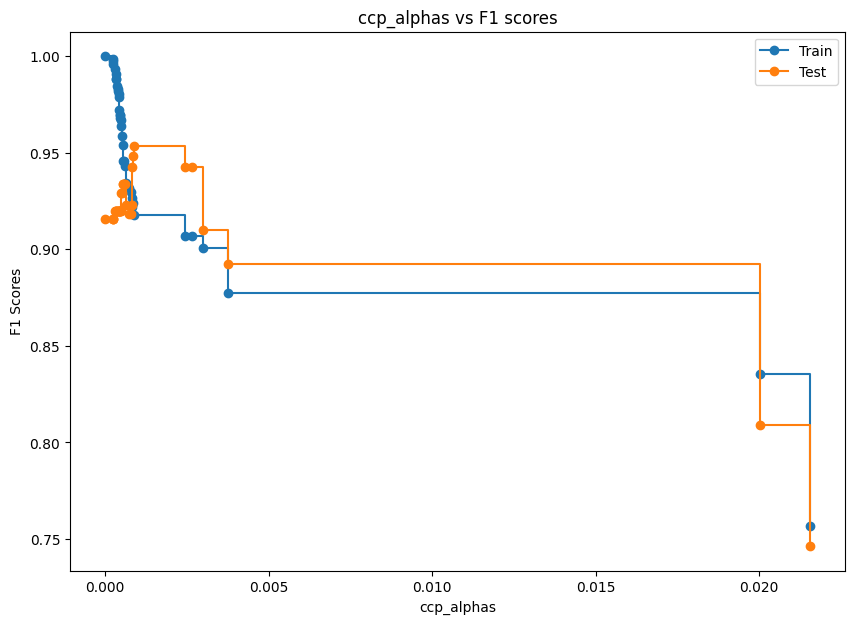

In [66]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(ccp_alphas,train_f1_scores,marker='o',drawstyle='steps-post',label='Train')
ax.plot(ccp_alphas,test_f1_scores,marker='o',drawstyle='steps-post',label='Test')
ax.set_xlabel('ccp_alphas')
ax.set_ylabel('F1 Scores')
ax.set_title('ccp_alphas vs F1 scores')
plt.legend()
plt.show()

- As ccp_alpha increases, the F1 score on the training data steadily decreases. This is expected because pruning removes nodes, making the model less complex and more generalized, which reduces its ability to fit the training data perfectly. On the test data, we observe that the F1 score initially improves slightly with small increases in ccp_alpha, indicating that light pruning helps reduce overfitting. However, as ccp_alpha continues to increase, the model becomes too simple, and the test F1 score also begins to drop — showing signs of underfitting.

In [101]:
best_index = np.argmax(test_f1_scores)
dtree3 = clfs[best_index]


#### Model Evaluation

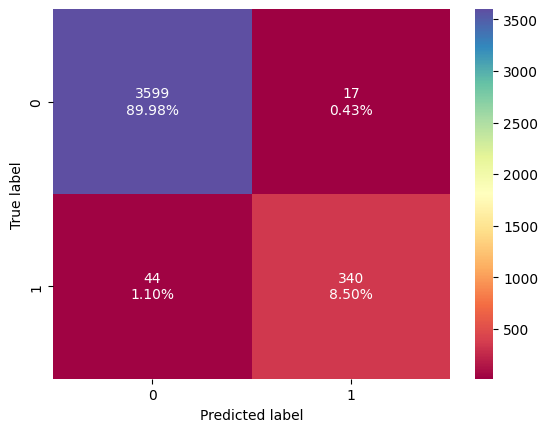

In [102]:
confusion_matrix_plot(dtree3,x_train,y_train)

In [103]:
dtree3_train = model_performance_evalution(dtree3,x_train,y_train)
dtree3_train

,Recall,Precision,F1,Accuracy
0,0.885417,0.952381,0.917679,0.98475


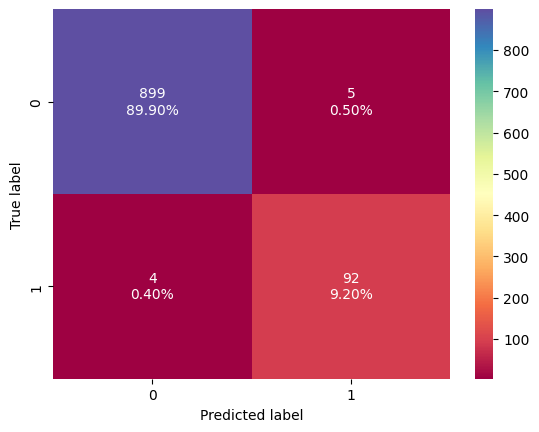

In [70]:
confusion_matrix_plot(dtree3,x_test,y_test)

In [71]:
dtree3_test = model_performance_evalution(dtree3,x_test,y_test)
dtree3_test

,Recall,Precision,F1,Accuracy
0,0.958333,0.948454,0.953368,0.991


#### Visualizing Decision Tree

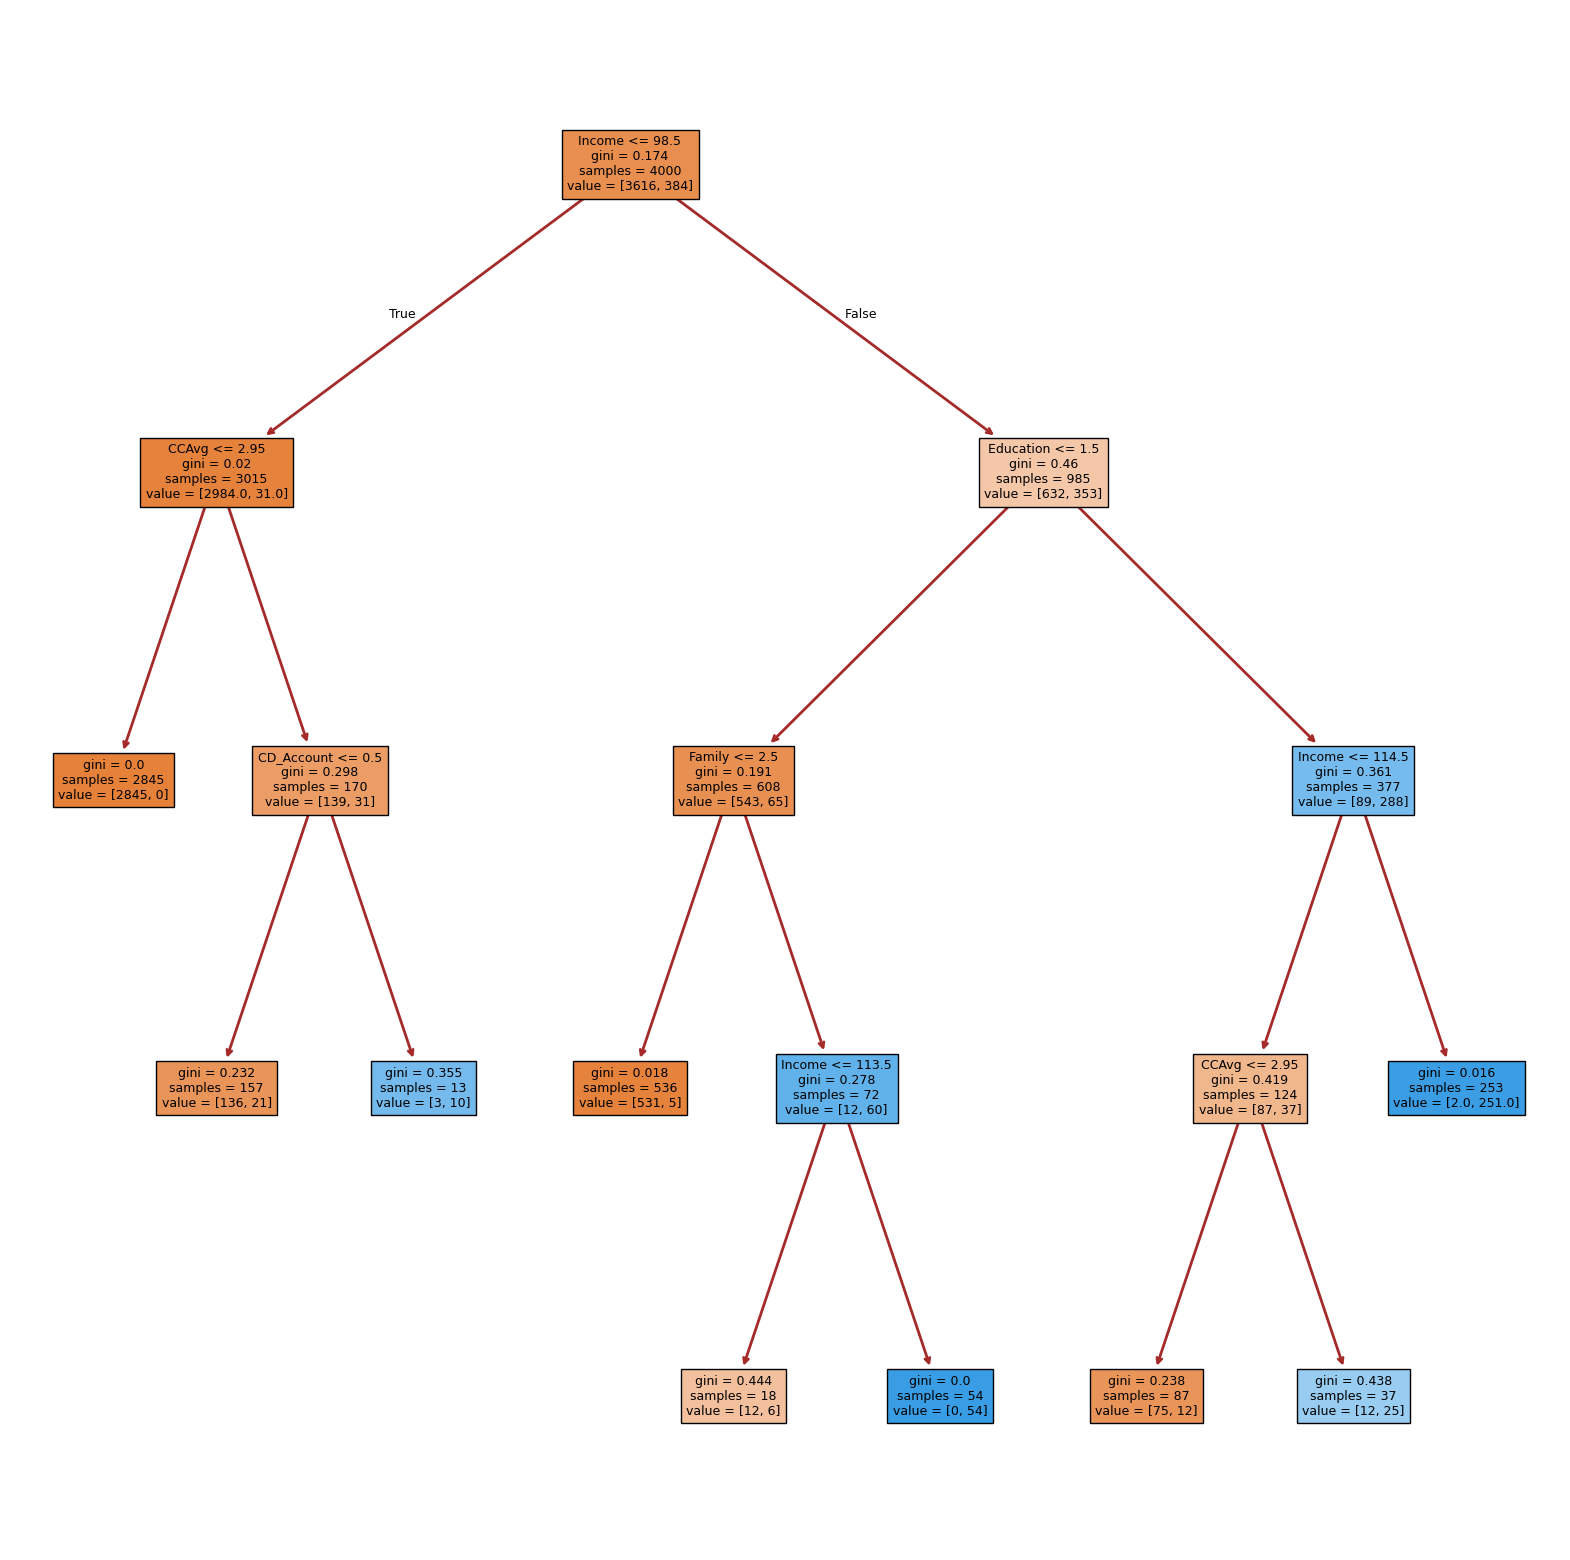

In [72]:
plt.figure(figsize=(20,20))

out2=tree.plot_tree(dtree3,feature_names=feature_names,fontsize=9,filled=True,node_ids=False,class_names=None, )

for o in out2:
  arrow2=o.arrow_patch
  if arrow2 is not None:
    arrow2.set_edgecolor('brown')
    arrow2.set_linewidth(2)
plt.show()

In [73]:
print(tree.export_text(dtree3,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [136.00, 21.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.00, 251.00] class: 1



In [74]:
print('The post-pruned tree has {} nodes and a depth of {}'.format(dtree3.tree_.node_count, dtree3.tree_.max_depth))

The post-pruned tree has 17 nodes and a depth of 4


### Decision Tree (Post-pruning)-Cross_validation

In [75]:
from sklearn.model_selection import cross_val_score

val_f1_scores = []  # List to store average F1 scores for each pruned tree

for ccp_alpha in ccp_alphas:  # Loop over all pruning parameters
    clf_c = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=RS)  # Create untrained tree with pruning
    f1 = cross_val_score(clf_c,                     # Untrained classifier
                         x_train, y_train,          # Use training data
                         cv=5,                      # Perform 5-fold cross-validation
                         scoring='f1')              # Use F1 score for evaluation
    val_f1_scores.append(f1.mean())  # Store the average F1 score across the 5 folds


- We use cross-validation to avoid the issue of selecting the model based on the highest test F1 score.
Using test F1 for model selection can leak test data into the training process, making the final evaluation unreliable.

- With cross-validation, the training data is split into 5 parts — the model is trained on 4 parts and validated on the remaining 1.
This process repeats 5 times, ensuring that every part is used for validation once.

- In this way, the model is trained and evaluated only using training data, and the test data remains untouched for the final check.
So instead of picking the best model based on test data, we pick it based on performance within the training data itself.

In [76]:
best_index1 = np.argmax(val_f1_scores)
dtree4 = clfs[best_index1]


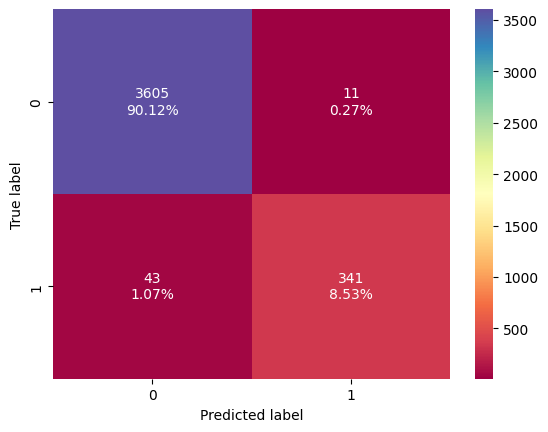

In [77]:
confusion_matrix_plot(dtree4,x_train,y_train)

In [78]:
dtree4_train = model_performance_evalution(dtree4,x_train,y_train)
dtree4_train

,Recall,Precision,F1,Accuracy
0,0.888021,0.96875,0.92663,0.9865


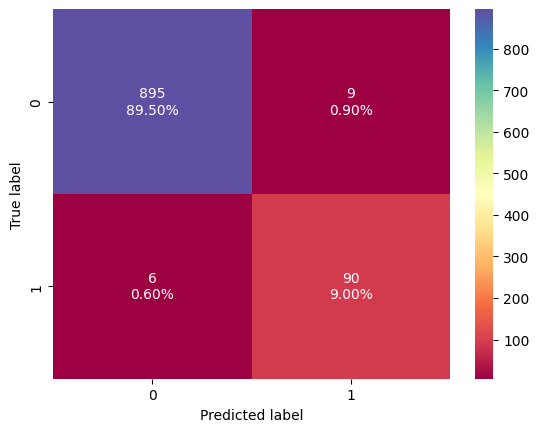

In [79]:
confusion_matrix_plot(dtree4,x_test,y_test)

In [80]:
dtree4_test = model_performance_evalution(dtree4,x_test,y_test)
dtree4_test

,Recall,Precision,F1,Accuracy
0,0.9375,0.909091,0.923077,0.985


#### Visualizing Decision Tree

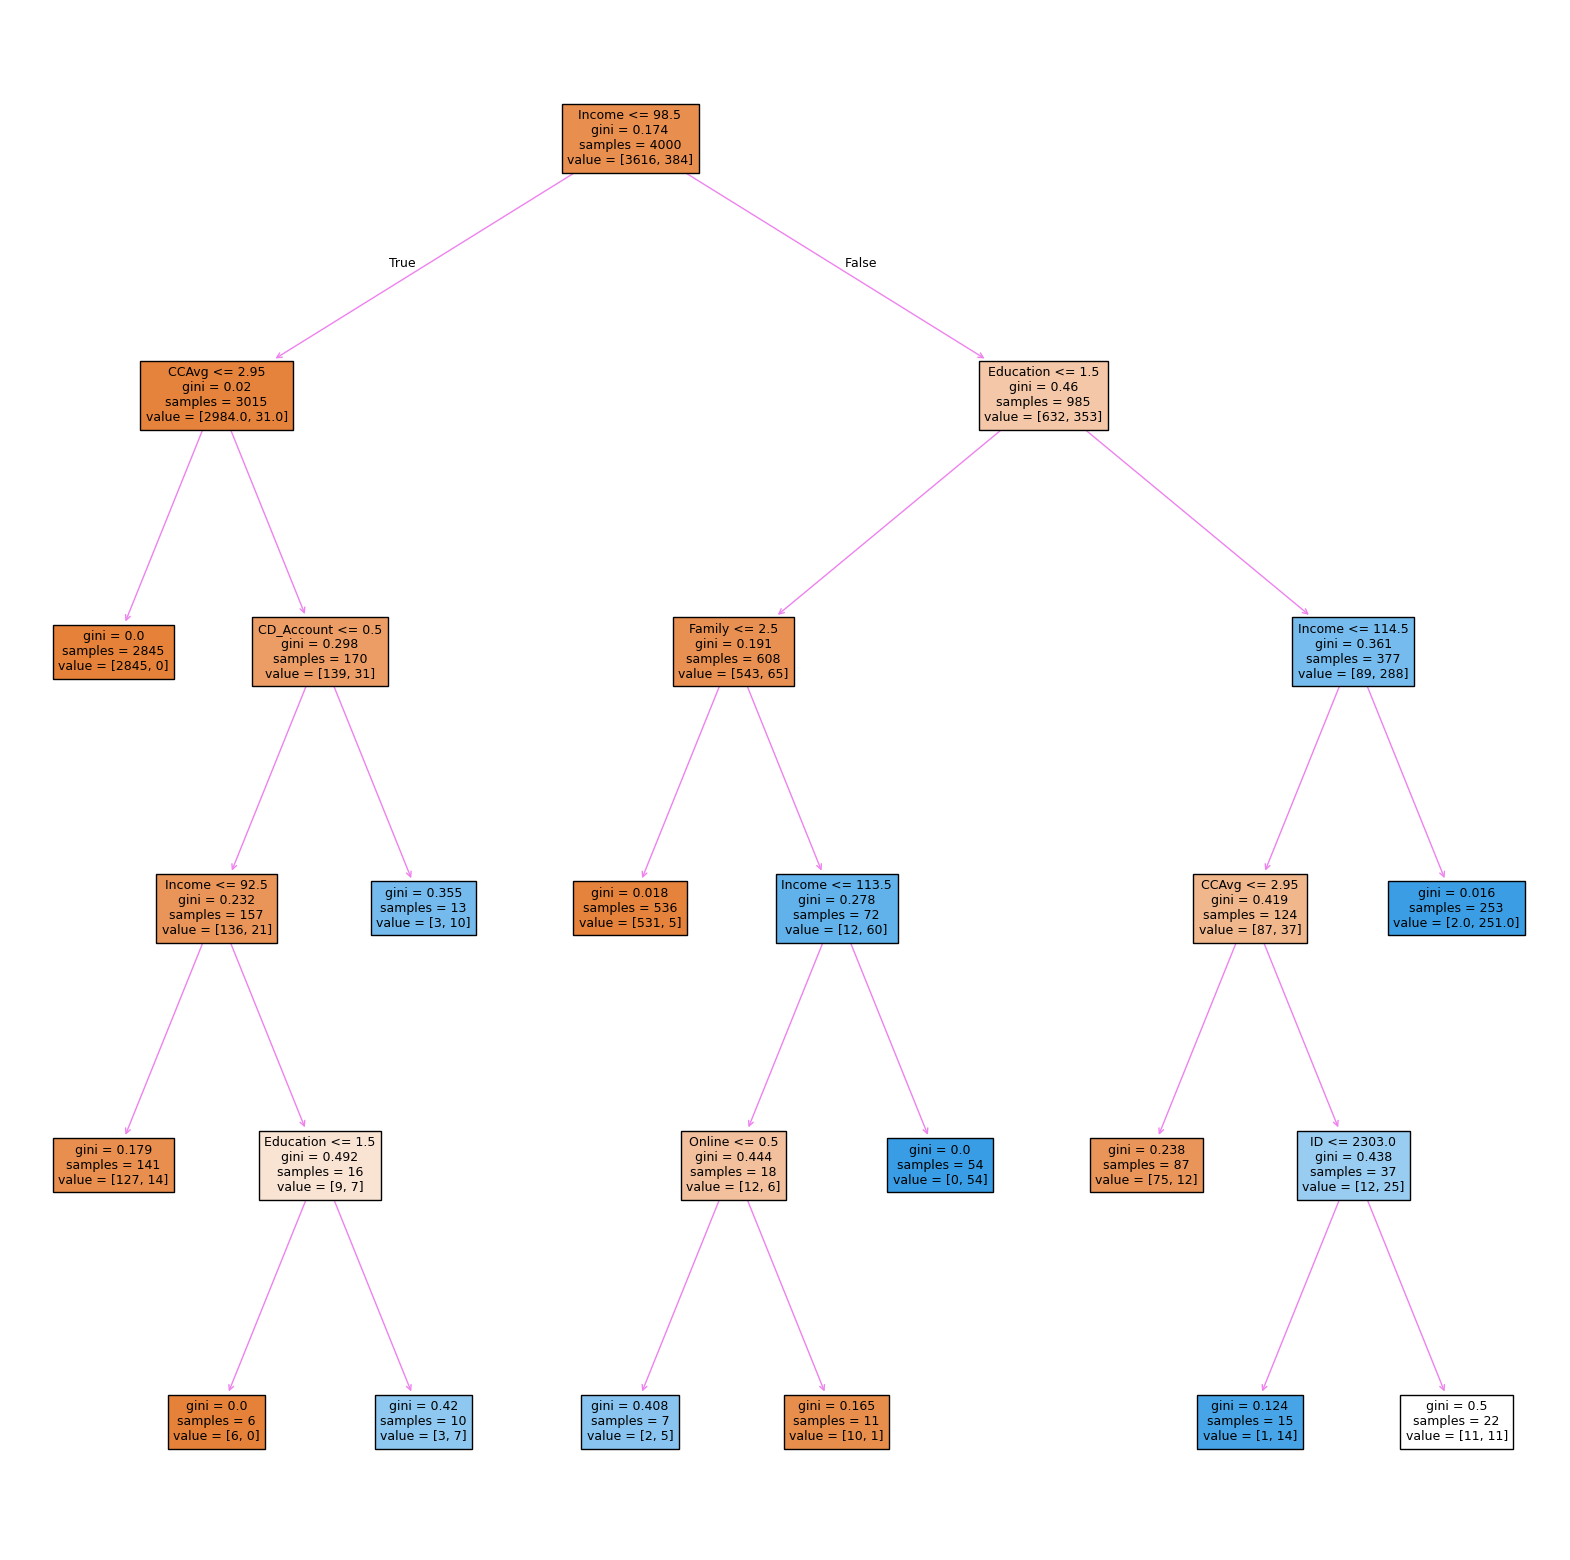

In [81]:
plt.figure(figsize=(20,20))

out3=tree.plot_tree(dtree4,feature_names=feature_names,fontsize=9,filled=True,node_ids=False,class_names=None, )

for o in out3:
  arrow3=o.arrow_patch
  if arrow3 is not None:
    arrow3.set_edgecolor('violet')
    arrow2.set_linewidth(1.5)
plt.show()

In [82]:
print(tree.export_text(dtree4,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [127.00, 14.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [3.00, 7.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |--- weights: [2.00, 5.00] class: 1
|   |   |   |   |--- Online >  0.50
|   |   |   |   |   |--- weights: [10.00, 1.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: 1
| 

In [83]:
print('The post-pruned(cross_validation) tree has {} nodes and a depth of {}'.format(dtree4.tree_.node_count, dtree4.tree_.max_depth))

The post-pruned(cross_validation) tree has 25 nodes and a depth of 5


- We can see that, compared to the post-pruned tree selected using the maximum test F1 score, the tree selected using cross-validation has more nodes and greater depth.
This suggests that the cross-validation tree retains more meaningful information while still avoiding overfitting.

# **Model Performance Comparison and Final Model Selection**

In [182]:
models_train_comp_df = pd.concat(
    [
        dtree1_train.T,
        dtree2_train.T,
        dtree2_1_train.T,
        dtree3_train.T,
        dtree4_train.T,

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning-Max_Range)",
    "Decision Tree (Pre-Pruning-Min_Range)",
    "Decision Tree (Post-Pruning_max_F1)",
    'Decision Tree (Post-Pruning-Cross_validation)',
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning-Max_Range),Decision Tree (Pre-Pruning-Min_Range),Decision Tree (Post-Pruning_max_F1),Decision Tree (Post-Pruning-Cross_validation)
Recall,1.0,0.885417,0.750000,0.885417,0.888021
Precision,1.0,0.952381,0.763926,0.952381,0.968750
F1,1.0,0.917679,0.756899,0.917679,0.926630
Accuracy,1.0,0.984750,0.953750,0.984750,0.986500


In [184]:
models_test_comp_df = pd.concat(
    [
        dtree1_test.T,
        dtree2_test.T,
        dtree2_1_test.T,
        dtree3_test.T,
        dtree4_test.T,

    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning-Max_range)",
    "Decision Tree (Pre-Pruning-Min_Range)",
    "Decision Tree (Post-Pruning_max_F1)",
    'Decision Tree (Post-Pruning-Cross_validation)',
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning-Max_range),Decision Tree (Pre-Pruning-Min_Range),Decision Tree (Post-Pruning_max_F1),Decision Tree (Post-Pruning-Cross_validation)
Recall,0.958333,0.958333,0.781250,0.958333,0.937500
Precision,0.876190,0.948454,0.714286,0.948454,0.909091
F1,0.915423,0.953368,0.746269,0.953368,0.923077
Accuracy,0.983000,0.991000,0.949000,0.991000,0.985000


***Why Pre-Pruning (with Max Range) and Post-Pruning (Using Max Test F1) Result in Similar Scores***

1.We observe that both the pre-pruned (with max range) and post-pruned models are giving nearly identical results.

2.This is likely because, in pre-pruning, we used extensive hyperparameter ranges — for example, max_depth from 1 to 12 and max_leaf_nodes from 10 to 101.
3.This means the model explored a wide space and selected the one with the maximum F1 score on the test set.

4.Similarly, in post-pruning, we generated a series of pruned trees using all possible ccp_alpha values, and again selected the model with the highest test F1 score.

4.So even though the pruning techniques are different, both strategies end up producing similar models because they're both optimized based on the same test F1 metric — which naturally leads them to converge to similar complexity levels.


**Selecting the Best Model**

We selected the Decision Tree with Post-Pruning using Cross-Validation because it offers the best generalization performance. It achieves high F1 and accuracy scores on both training and test data, indicating a balanced model that avoids overfitting and underfitting. This makes it the most reliable choice for consistent real-world performance.

### Feature Importance

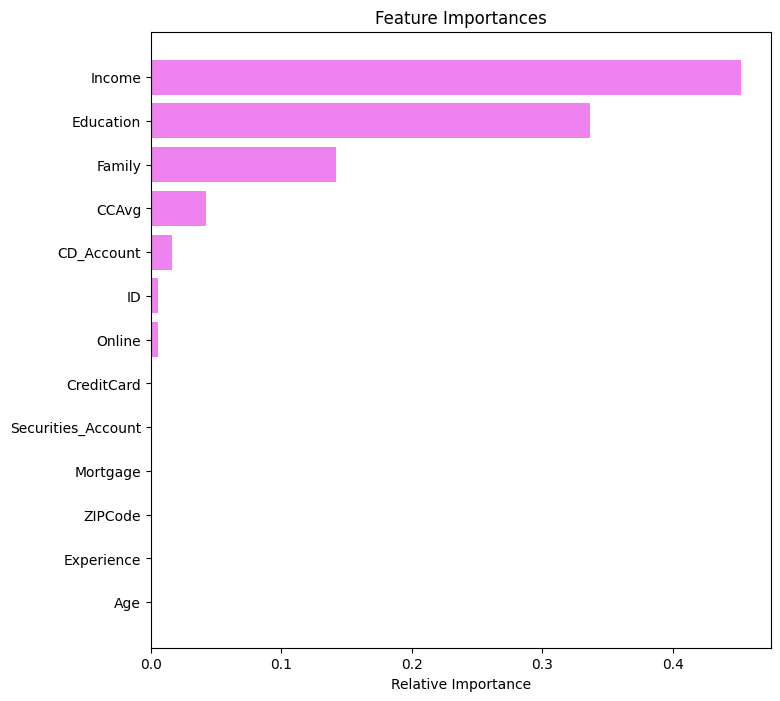

'\n- Feature importance provides a score for each feature in the range of 0 to 1, where 0 indicates low importance and 1 indicates high importance. The total sum of all feature importances does not exceed 1, as they represent the relative contribution of each feature to the model. We use argsort to sort the features by importance in descending order, making it easier to visualize the most influential features first.\n'

In [191]:
importances=dtree4.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

'''
- Feature importance provides a score for each feature in the range of 0 to 1, where 0 indicates low importance and 1 indicates high importance. The total sum of all feature importances does not exceed 1, as they represent the relative contribution of each feature to the model. We use argsort to sort the features by importance in descending order, making it easier to visualize the most influential features first.
'''

- Although it's visually difficult to interpret the impact of Income on Personal_Loan due to its binary nature and the continuous range of Income values, the decision tree model effectively captures this relationship by identifying optimal income thresholds that separate the classes. This highlights the strength of decision trees in handling complex, non-linear patterns that aren't immediately visible through simple plots or crosstabs.

- Education and Family also play a crucial role and are among the most important features after Income.

### Predicting on a single data point

In [228]:
%%time
approval_prediction = dtree4.predict(x_test.iloc[:1,:])

print(approval_prediction)

[0]
CPU times: user 5.59 ms, sys: 0 ns, total: 5.59 ms
Wall time: 7.55 ms


- We use x_test to evaluate how well the model performs on unseen data, and also to check the prediction speed. This helps us assess both the model’s generalization ability and how efficiently it can make decisions in real-world scenarios.

- And here the prediction is 0 and the speed is approximately 7.55 milliseconds

In [237]:
# making a prediction
approval_likelihood = dtree4.predict_proba(x_test)

print(approval_likelihood[1,1])

0.9920948616600791


- The model is 99% confident that row 1 in the test data belongs to class 1.

# **Business Recommendations**

-  This model can support the bank's initial decision-making by identifying customers who are likely to take a personal loan.

- Instead of outputting an approve or reject, the model can be made to output the likelihood that a customer will accept a personal loan.

- The bank can use this model to automatically screen personal loan applications in the early stages. In cases where the predicted likelihood of approval is below a certain threshold (e.g., 60%), the application can be flagged for manual review to ensure more accurate decision-making.

- Adjust loan terms (amount, interest, tenure) based on predicted acceptance likelihood.

- Use the model to identify high-potential customers for loan promotions



### Key takeaways - Marketing Team

- High-Income Customers – Most likely to accept loans. Prioritize those earning above average.

- Highly Educated – Focus on customers with Master’s or Ph.D. degrees.

- Families with 2–3 Members – Ideal life stage for loan needs.

- Credit Card Users – Already engaged with credit products, more open to loans

- Customers who use online banking are more digitally active and may respond better to digital loan offers.
